# **1. Business Problem Understanding**

<img src="https://miro.medium.com/v2/resize:fit:1400/0*1xpyGAJH3PgjTSCn"  width="600" height="300"> 

## **1.1. Defining the Problem and Objectives**

**a. Context**:

An **e-commerce company** is a platform that enables **sellers and customers** to conduct transactions through a **website or mobile app**. The company generates **revenue** from each transaction made by customers, making **customer growth** and **customer retention** key factors in increasing profits. If the company fails to **retain existing customers**, those customers are at risk of **churning**, which will ultimately reduce revenue. Therefore, the e-commerce company aims to **identify customers who are at risk of leaving**, allowing them to take a **proactive approach** by offering **relevant promotions** and **personalized incentives** to retain these customers.

**b. Problem Formulation**: 

1. **How** can the e-commerce company **predict which customers are at risk of churning?**
2. **What** are the key **factors** influencing customer churn?
3. **What recommendations** or strategies can be implemented to reduce churn and retain high-value customers?

**c. Objective**:

To address this issue, the company aims to leverage its **Data Analytics Team** to **predict customers likely to churn** or stop using their services. By identifying these **at-risk customers**, the company can take **proactive measures**, such as offering **targeted promotions** or **personalized incentives**, to retain them. This approach will help enhance **customer loyalty**, reduce **churn rates**, and maximize **profitability**.

**Target:**  
- **0** : Customer does not churn  
- **1** : Customer churns  

---

## **1.2. Goals**

Based on the identified problem, the following are the objectives that the data analyst team aims to achieve in this project:

1. **Build a Churn Prediction Model**: Develop a model to predict customers at risk of churning for targeted **marketing** and **retention strategies**.
2. **Identify Churn Drivers**: Analyze factors influencing customers' decisions to **stay** or **leave**.
3. **Design Effective Retention Strategies**: Develop retention strategies, such as relevant **promotions** or **service improvements**, using insights from the model.

---

## **1.3. Analytical Approach**

The analytical approach for this project consists of the following steps:

1. **Data Understanding**: Collect and understand the dataset, identify features and target variable (churn).
2. **EDA**: Explore data to find patterns, relationships, and data quality issues.
3. **Define X and y**: Split the dataset into features (X) and target variable (y).
4. **Train-Test Split**: Divide the data into training and testing sets.
5. **Preprocessing**: Clean, normalize, and encode data; handle missing values.
6. **Benchmark Model / Cross Validation**: Train a simple model and evaluate using cross-validation.
7. **Hyperparameter Tuning**: Optimize model hyperparameters to improve performance.
8. **Predict To Test**: Make predictions on the test set to evaluate the model.
9. **Optimized Threshold**: Adjust the decision threshold to improve precision and recall.
10. **Confusion Matrix**: Evaluate model performance using a confusion matrix.
11. **Explainable ML**: Use tools to explain how features impact predictions.
12. **Conclusion and Recommendation**: Summarize insights and suggest actionable strategies.

---

### **1.4. Metrics Evaluations**  

**Example Calculation Based on Hypothetical Data**:  
- **Total Monthly Revenue**: $100,000  
- **Total Active Customers per Month**: 500  
- **Average Revenue per Customer**: $100,000 ÷ 500 = **$200**  
- **Average Promotion Cost per Customer**: **$50** (based on marketing expense reports).  

---

**Type 1 Error** --> **False Positive (FP)**: The model predicts that a **customer will churn, but in reality, the customer does not churn.**  

- **Impact**: The company will **incur additional costs** to offer **promotions or discounts** to customers who were incorrectly predicted to churn. This increases operational costs without providing significant benefits in reducing the churn rate. However, even though the targeting is incorrect, the customer may **still make purchases**, so the losses remain **limited**.  

- **Assumed Cost**: **Potential loss per case of false positive: $50**.  

---

**Type 2 Error** --> **False Negative (FN)**: The model predicts that a **customer will not churn, but in reality, the customer churns.**  

- **Impact**: The company will **lose the opportunity** to retain the customer by offering **better services** or **special promotions** to reduce churn. This loss could result in **reduced revenue** and an **increased overall churn rate**.  

- **Assumed Cost**: **Potential loss per case of false negative: $200**.  

---

It is **crucial** for the company to use predictive methods that not only **minimize errors in identifying churned customers (False Negatives)** but also **reduce errors in classifying loyal customers as churned (False Positives)**.  

However, the machine learning model must prioritize **minimizing False Negatives (FN)** over **False Positives (FP)**, as the losses associated with FN are **much greater**. When customers truly churn but are not detected by the model (FN), the company **loses the entire potential revenue from those customers**, both in the short term and in the future.  

---

**Conclusion:**  

**F2 Score** is a **more suitable metric** to use in this case, as it places **greater emphasis on Recall** compared to Precision. In the context of churn prediction, **False Negatives (FN)** have a far greater impact on revenue losses than **False Positives (FP)**. Therefore:  

- **F2 Score prioritizes the model’s sensitivity** to customers who are at genuine risk of churn.  
- By **increasing Recall** (**reducing FN**), the company can **minimize the loss of potential customers** who could be retained through proactive strategies like promotions or additional services.  
- **F2 Score still considers Precision** to ensure that the number of **False Positives (FP)** does not become too large, keeping the **incentive costs under control**.  

By using **F2 Score**, the company can achieve an **optimal balance** between **reducing customer loss** and **efficiently managing promotional costs**.  

In [116]:
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# train test split
from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder

# resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# algortima ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# cross validation 
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_validate, StratifiedKFold

# ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# metrics classification
from sklearn.metrics import make_scorer, recall_score, f1_score, fbeta_score, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

import shap 
import lime

# model saving
import pickle

# import warning
import warnings
warnings.filterwarnings('ignore')


## **1.5. Data Understanding**
The dataset utilized in this analysis focuses on **customer behavior** and **engagement** with an **e-commerce platform**, with the primary goal of understanding the factors that influence **customer churn**. Each feature in the dataset provides valuable insights into **customer profiles**, **preferences**, and **interactions with the service**. This information serves as a foundation for identifying **patterns** and creating a **predictive model for churn**. Below is a detailed overview of the dataset's features:

| Feature                  |Description                                                 |
|--------------------------|------------------------------------------------------------|
| Tenure                   |Tenure of a customer in the company.                       |
| WarehouseToHome          |Distance between the warehouse to the customer’s home.     |
| NumberOfDeviceRegistered |Total number of devices registered on a particular customer.|
| PreferedOrderCat         |Preferred order category of a customer in the last month.  |
| SatisfactionScore        |Satisfactory score of a customer on service.               |
| MaritalStatus            |Marital status of a customer.                              |
| NumberOfAddress          |Total number of addresses added for a particular customer. |
| Complaint                |Any complaint raised in the last month (1: Yes, 0: No).    | 
| DaySinceLastOrder        |Days since the customer's last order.                      |
| CashbackAmount           |Average cashback in the last month.                        |
| Churn                    |Churn flag (1: Churned, 0: Not churned).                   |

Dataset Source
The dataset can be downloaded from the following link: [E-Commerce Dataset Churn](https://drive.google.com/drive/u/0/folders/1jFqoDYQnmFccw6NC_cepeJzAJPh5bIIm)

In [117]:
df_original = pd.read_csv('data_ecommerce_customer_churn.csv')

df = df_original.copy()
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


**Understanding Column Meanings: Row 5 Breakdown (example)**

In [118]:
df.loc[[5]]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
5,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0


| **No** | **Features** | **Description** |
| --- | --- | --- |
| 1 | Tenure = 7 | The customer has been using the company’s services for 7 months |
| 2 | WareHouseToHome = 16.0| The distance from the customer's home to the warehouse is 16 kilometers. This may impact delivery times and customer satisfaction |
| 3 | NumberOfDeviceRegistered = 4 | The customer has registered 4 devices for the company's services |
| 4 | PreferedOrderCat = Mobile Phone | The customer prefers ordering products from the Mobile Phone category. This indicates their shopping preference |
| 5 | SatisfactionScore = 2 | The customer’s satisfaction score is 2 on a scale (likely from 1 to 5). This suggests that the customer is not very satisfied with the services |
| 6 | MaritalStatus = Divorced | The customer’s marital status is Divorced. This demographic data could be used for segmenting customer groups |
| 7 | NumberOfAddress = 2 | The customer has 2 addresses registered with the company. Ex : home address, and a work or family address|
| 8 | Complain = 0 | The customer has not filed any complaints. A value of 0 means no complaints |
| 9 | DaySinceLastOrder = 11 | It has been 11 days since the customer last placed an order with the company |
| 10 | CashbackAmount = 152.81 | The customer has received a total cashback amount of $152.81. This cashback could be from previous transactions or promotional offers.
| 11 | Churn = 0 | A value of 0 indicates that the customer is not churned and is still actively using the company's services |

1.  Demographic Data : Demographic data provides insights into the personal characteristics of the customer
- MaritalStatus
- NumberOfAddress

2. Behavioral Data : Behavioral data reflects how the customer interacts with the company
- NumberOfDeviceRegisterd
- Complain

3. Transactional Data : Transactional data focuses on customer activity related to orders and spending
- DaySinceLastOrder
- CashbackAmount
- Churn

4. Service Usage Data : Service usage data reflects the customer’s interactions with the company’s offerings
- Tenure
- WarehouseToHome
- PreferedOrderCat
- SatifactionScore


In [119]:
print(f'The number of rows and columns in this dataset is {df.shape[0]} rows & {df.shape[1]} columns')
print(f'The index starts from {df.index}')

The number of rows and columns in this dataset is 3941 rows & 11 columns
The index starts from RangeIndex(start=0, stop=3941, step=1)


In [120]:
# pd.set_option('display.max_colwidth', None)
pd.reset_option('all')
pd.DataFrame({
    'column': df.columns.values,
    'data_type': df.dtypes.values,
    'missing_value': df.isna().sum().values,
    'missing_value(%)': df.isna().mean().values * 100,
    'negative_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'duplicate(%)' : df.duplicated().mean() * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,column,data_type,missing_value,missing_value(%),negative_value(%),0_value(%),duplicate,duplicate(%),n_unique,sample_unique
0,Tenure,float64,194,4.923,0.0,8.805,671,17.026,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,169,4.288,0.0,0.000,671,17.026,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,0,0.000,0.0,0.000,671,17.026,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,0.000,0.0,0.000,671,17.026,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,0,0.000,0.0,0.000,671,17.026,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,0.000,0.0,0.000,671,17.026,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.000,0.0,0.000,671,17.026,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,0.000,0.0,71.758,671,17.026,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.405,0.0,8.754,671,17.026,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,0,0.000,0.0,0.076,671,17.026,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


In [121]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: count, dtype: int64

In [122]:
df.replace(to_replace="Mobile", value="Mobile Phone", inplace=True)

> The value 'Mobile' has the same meaning as 'Mobile Phone,' so they will be merged into a single category.

In [123]:
df.columns[df.isna().any()]

Index(['Tenure', 'WarehouseToHome', 'DaySinceLastOrder'], dtype='object')

> There are 3 columns with missing values

In [124]:
df.duplicated().sum()

672

In [125]:
df[df.duplicated()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0
...,...,...,...,...,...,...,...,...,...,...,...
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


> There are 671 duplicate rows

In [126]:
df.drop_duplicates(inplace=True)

In [127]:
df['Churn'].value_counts()/df.shape[0]

Churn
0    0.836953
1    0.163047
Name: count, dtype: float64

**Summary:**

1. **Column Data Types:**

- **Numerical Variables:** Tenure, WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, DaySinceLastOrder, CashbackAmount. --> These will undergo robust scaling during preprocessing.

- **Categorical Variables:** PreferedOrderCat, MaritalStatus. --> These will be encoded using OneHot encoding during preprocessing.

2. **Missing Values:** Found in the columns `Tenure`, `WarehouseToHome`, and `DaySinceLastOrder`. --> These will be handled using iterative imputation and simple median imputation.

3. There are unique values that have the same meaning, specifically 'Mobile' & 'Mobile Phone' in the `PreferredOrderCat` column, which will be merged into one category.

4. **Duplicate Rows:** 671 rows (17.026% of the dataset are duplicates). --> These will be removed to prevent redundancy, which could cause bias in classification.

5. **Target Imbalance:** Will be addressed using resampling.

- Class 0 (non-churn): 83.69%
- Class 1 (churn): 16.30%

All columns will be used in the machine learning process, except for the target column 'Churn'. No columns will be removed, as each column holds meaningful and relevant information for analysis.

---

# **2. Exploratory Data Analysis**

<Axes: >

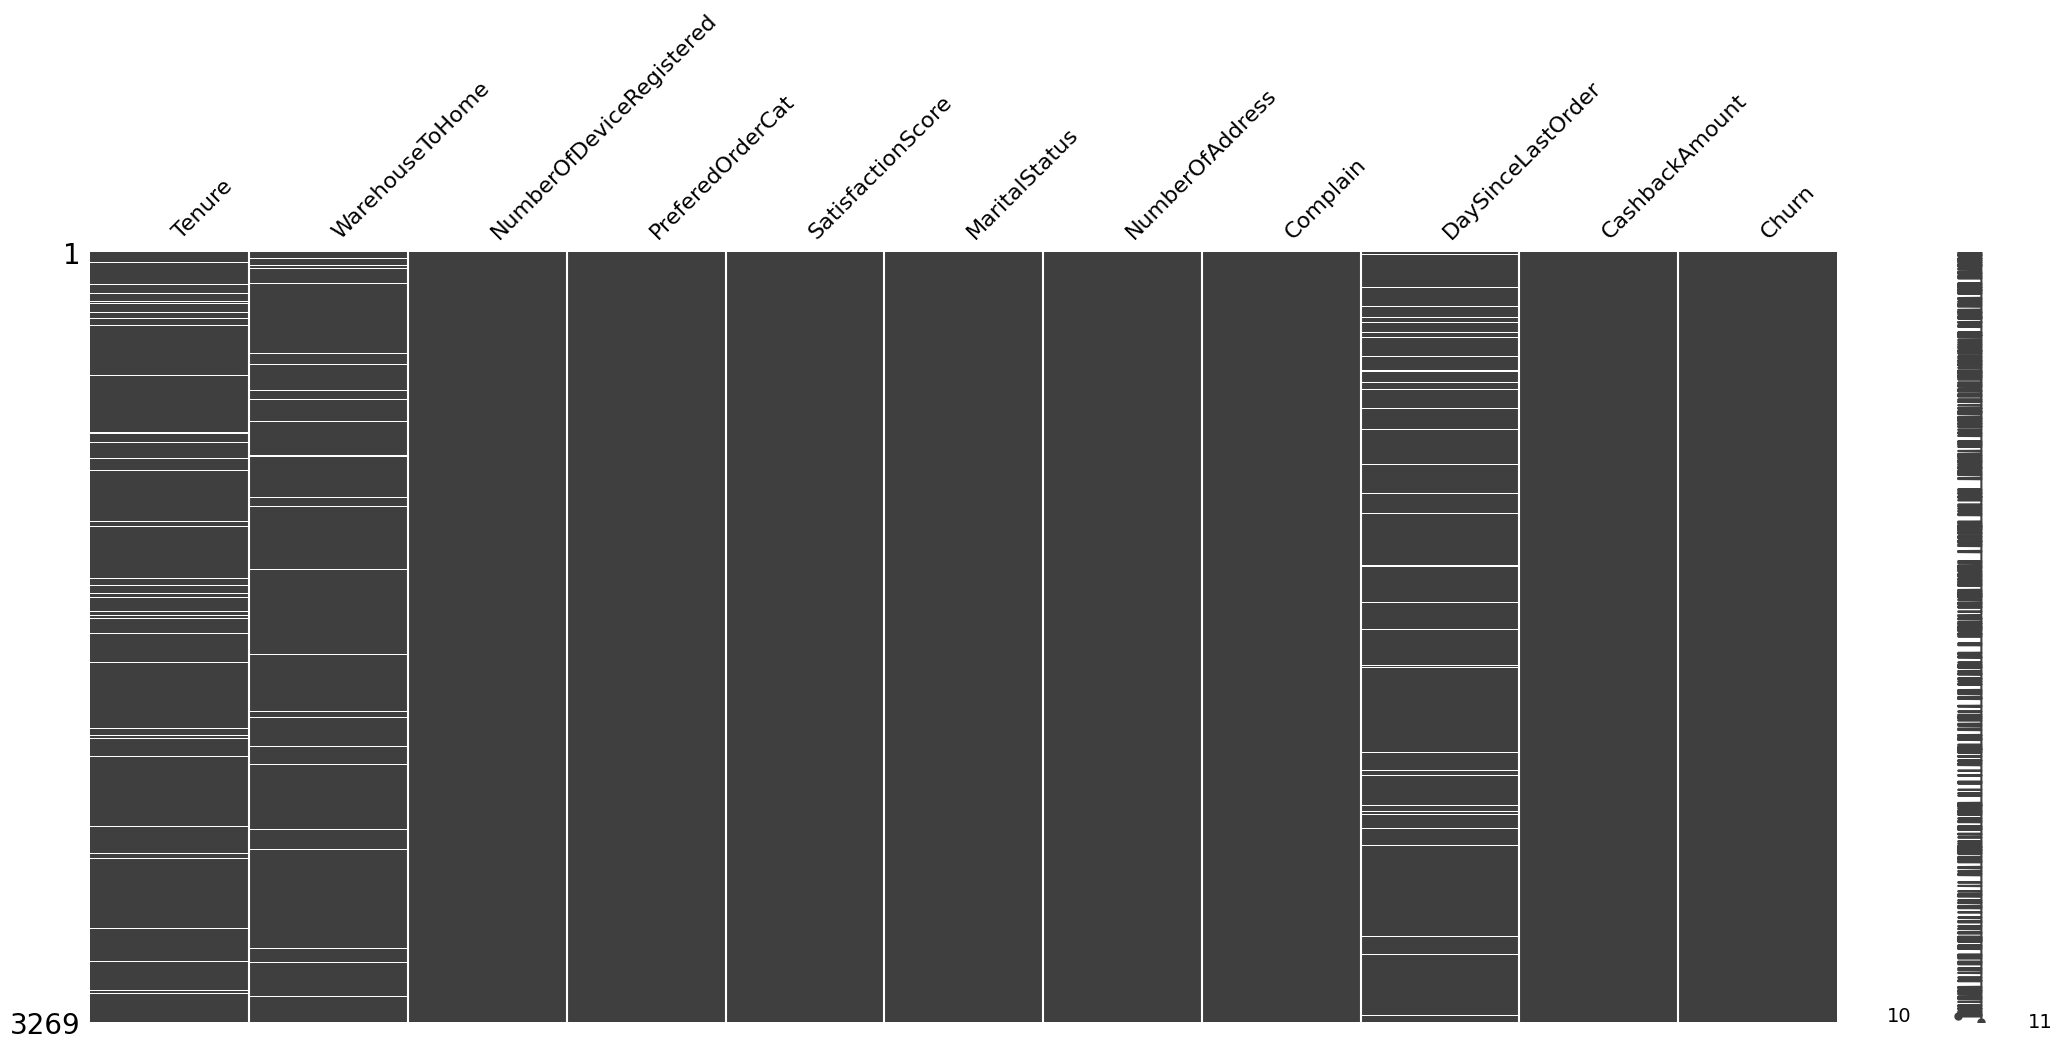

In [13]:
msno.matrix(df)

> In the matrix, the white areas indicate columns with missing values, specifically the columns Tenure, WarehouseToHome, and DaySinceLastOrder.

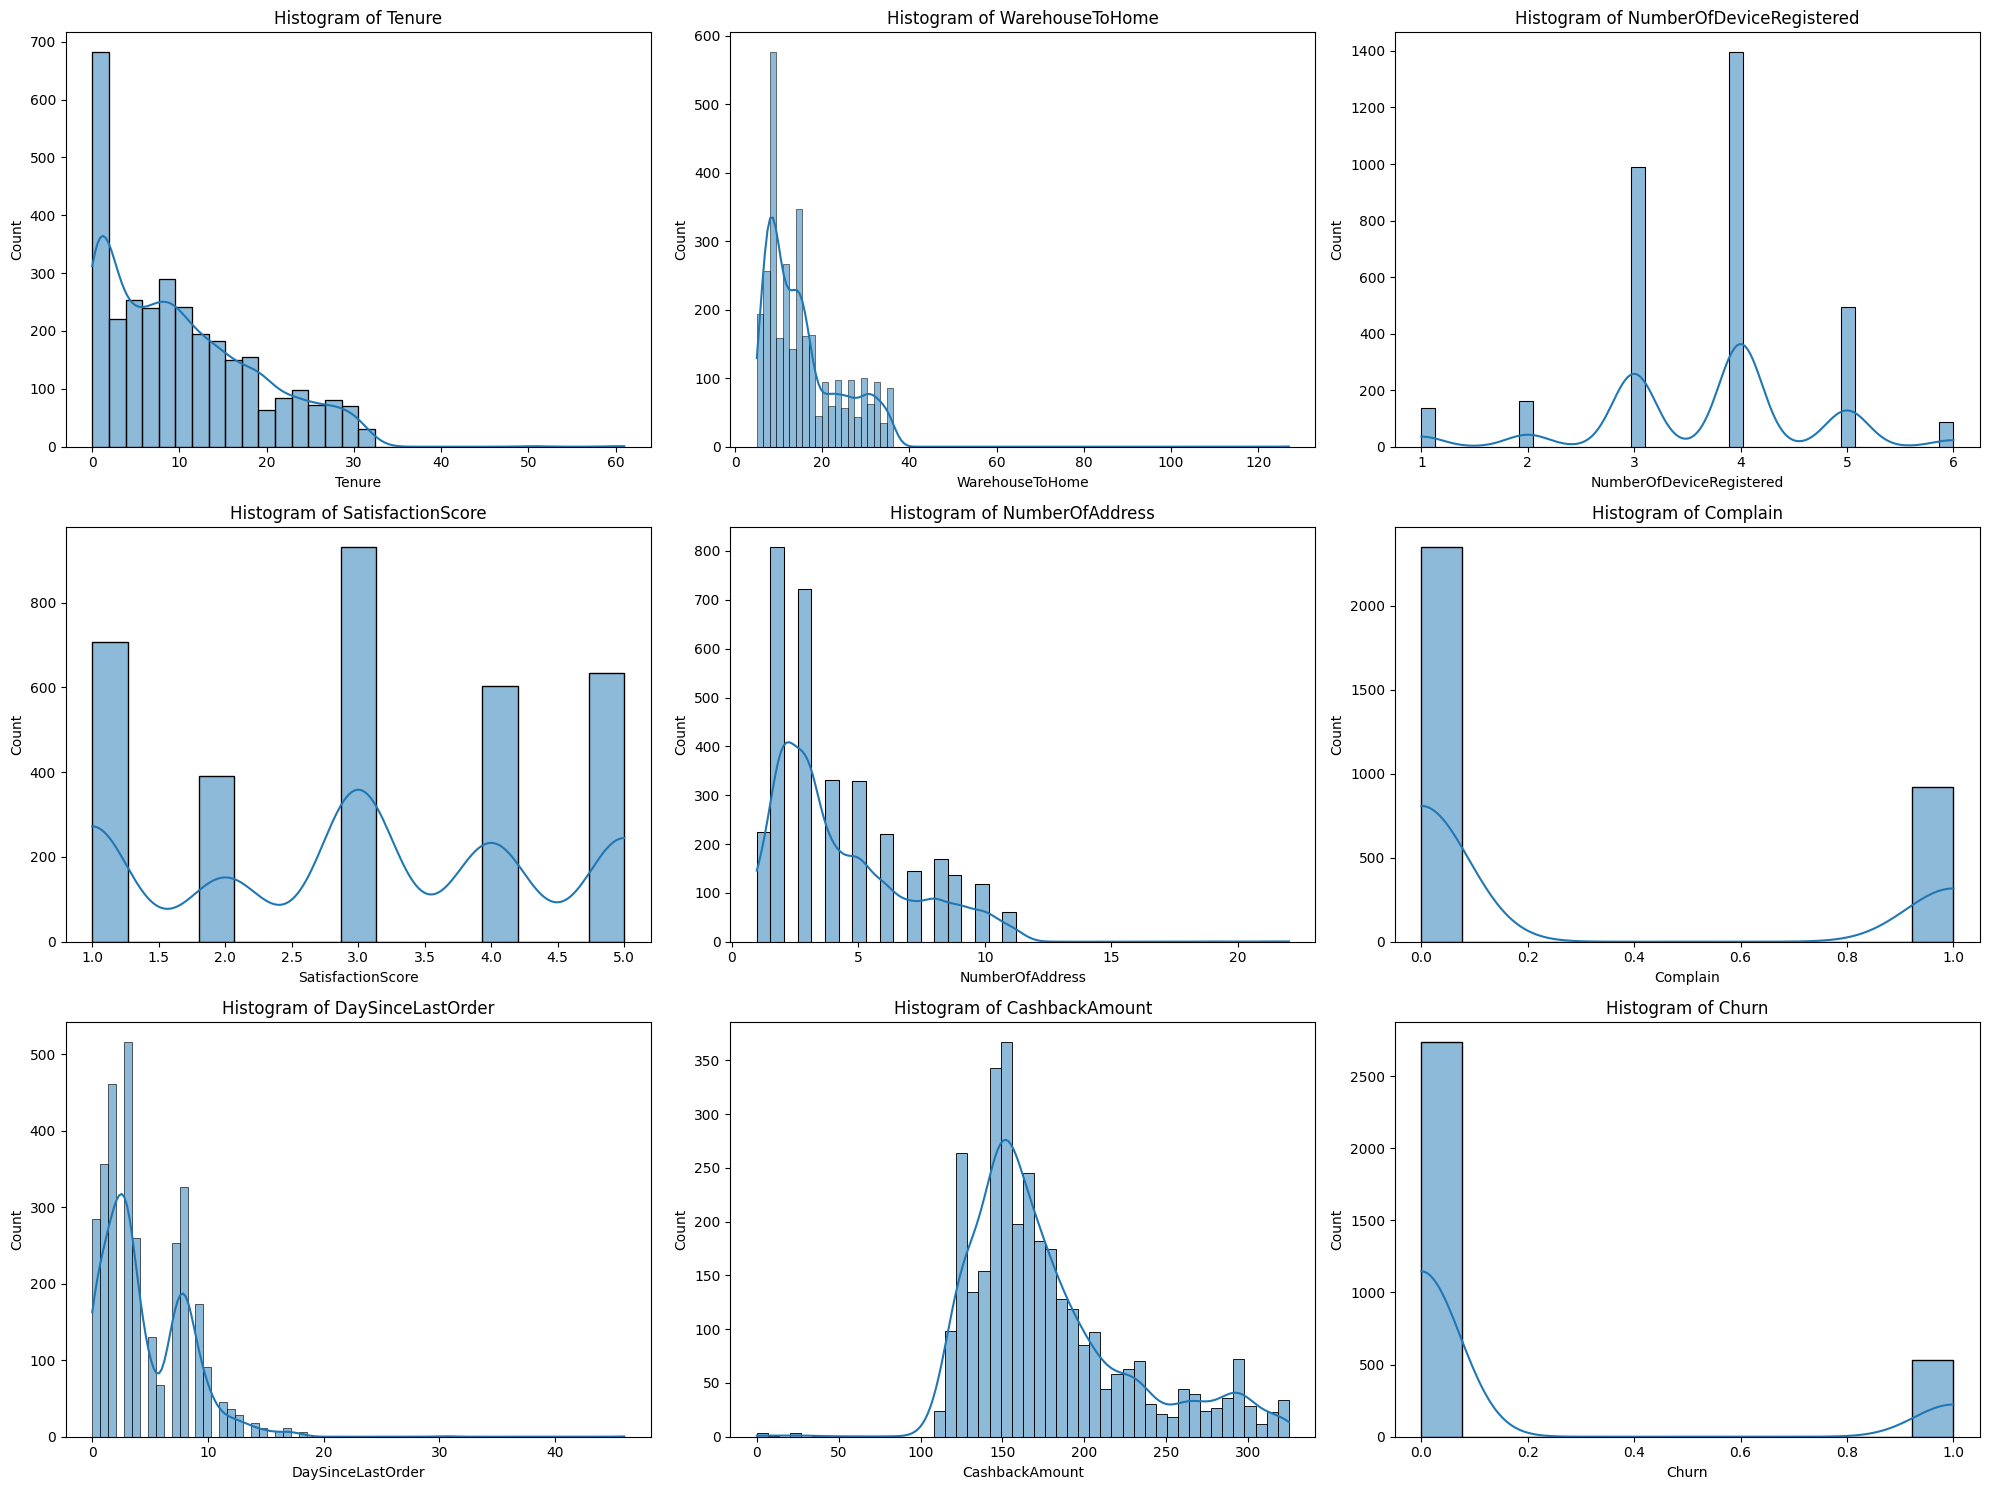

In [14]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

ncols = 3  
nrows = (len(numerical_columns) // ncols) + (len(numerical_columns) % ncols > 0)

plt.figure(figsize=(20, 5 * nrows))

for i in range(len(numerical_columns)): 
    plt.subplot(nrows, ncols, i + 1) 
    sns.histplot(data=df, x=numerical_columns[i], kde=True)  
    plt.title(f'Histogram of {numerical_columns[i]}')

plt.tight_layout()
plt.show()


---

In [15]:
from scipy.stats import kurtosis

# Skewness and Kurtosis analysis
for col in ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 
            'CashbackAmount']:
    
    skew = df[col].skew()
    kurt = df[col].kurtosis() + 3  # Adjusting for excess kurtosis
    skew_direction = 'Symmetric' if abs(skew) < 0.05 else ('Right Skewed' if skew > 0 else 'Left Skewed')
    
    # Kurtosis interpretation
    if kurt > 3:
        kurt_description = 'Leptokurtic (more peaked)'
    elif kurt < 3:
        kurt_description = 'Platykurtic (more flat)'
    else:
        kurt_description = 'Mesokurtic (normal distribution)'
    
    print(f"{col}:")
    print(f"  Skewness: {skew:.3f} ({skew_direction})")
    print(f"  Kurtosis: {kurt:.3f} ({kurt_description})")
    print("------------------------------")

Tenure:
  Skewness: 0.810 (Right Skewed)
  Kurtosis: 3.334 (Leptokurtic (more peaked))
------------------------------
WarehouseToHome:
  Skewness: 1.527 (Right Skewed)
  Kurtosis: 11.569 (Leptokurtic (more peaked))
------------------------------
NumberOfDeviceRegistered:
  Skewness: -0.406 (Left Skewed)
  Kurtosis: 3.615 (Leptokurtic (more peaked))
------------------------------
SatisfactionScore:
  Skewness: -0.086 (Left Skewed)
  Kurtosis: 1.818 (Platykurtic (more flat))
------------------------------
NumberOfAddress:
  Skewness: 1.115 (Right Skewed)
  Kurtosis: 4.185 (Leptokurtic (more peaked))
------------------------------
DaySinceLastOrder:
  Skewness: 1.430 (Right Skewed)
  Kurtosis: 9.549 (Leptokurtic (more peaked))
------------------------------
CashbackAmount:
  Skewness: 1.088 (Right Skewed)
  Kurtosis: 3.935 (Leptokurtic (more peaked))
------------------------------


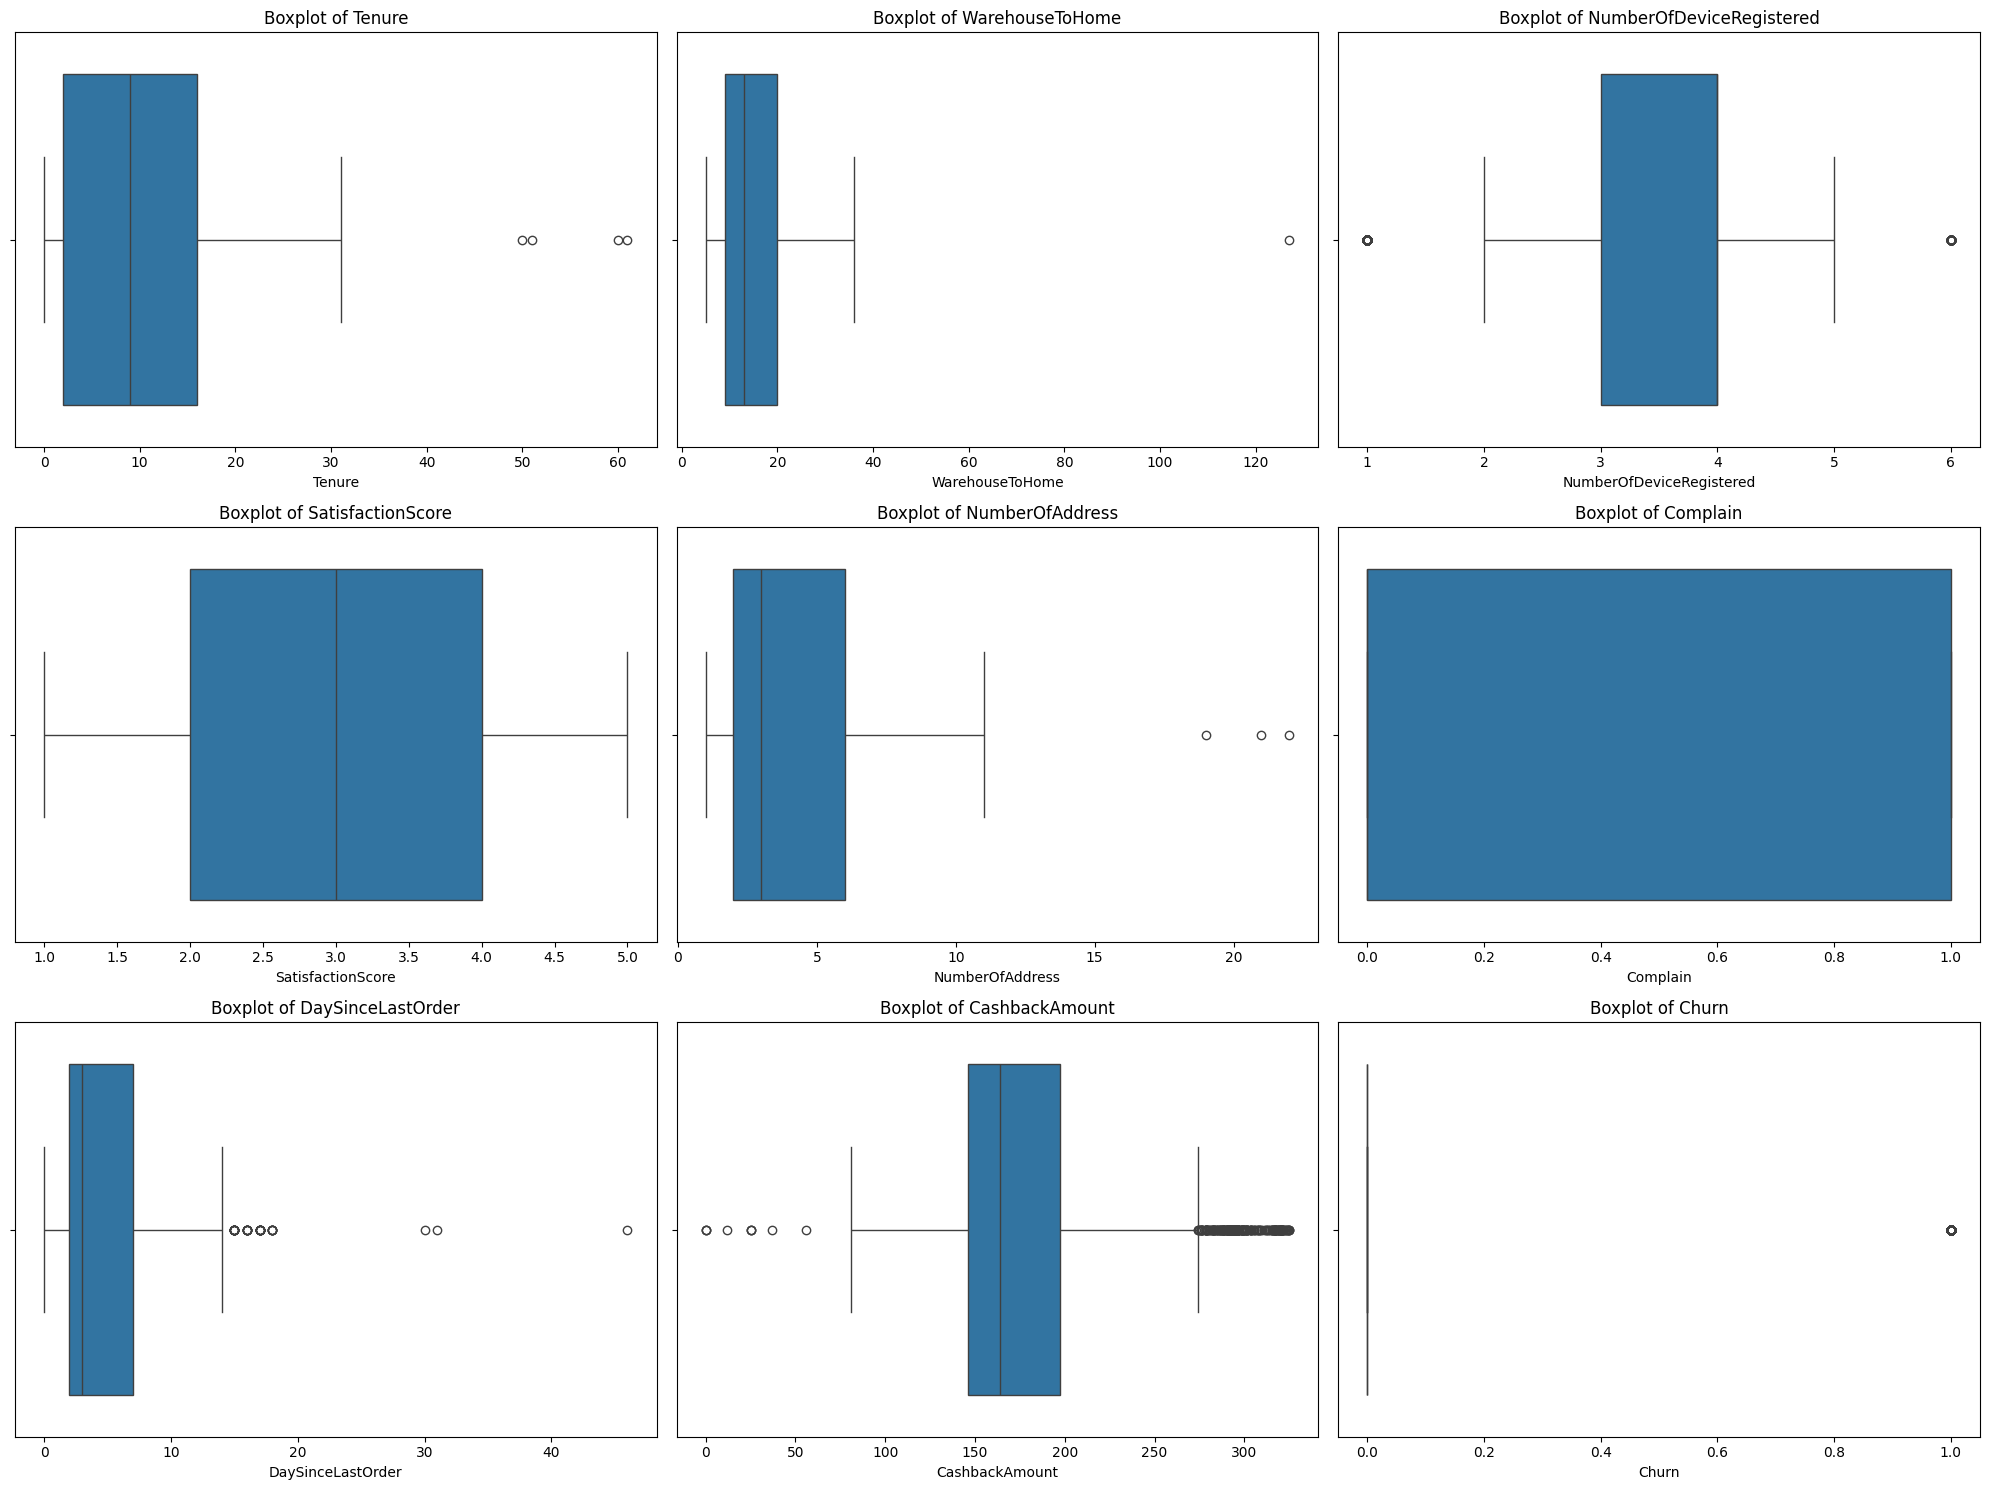

In [16]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

ncols = 3  
nrows = (len(numerical_columns) // ncols) + (len(numerical_columns) % ncols > 0)

plt.figure(figsize=(20, 5 * nrows))

for i in range(len(numerical_columns)): 
    plt.subplot(nrows, ncols, i + 1) 
    sns.boxplot(data=df, x=numerical_columns[i])
    plt.title(f'Boxplot of {numerical_columns[i]}')

plt.tight_layout()
plt.show()


In [17]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers[column]

# Mendeteksi dan menampilkan outlier untuk setiap kolom
columns_to_check = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered','NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']
for column in columns_to_check:
    outliers = detect_outliers(df, column)
    print(f"Outliers in column '{column}':")
    print(outliers.tolist())
    print("-" * 50)

Outliers in column 'Tenure':
[61.0, 51.0, 60.0, 50.0]
--------------------------------------------------
Outliers in column 'WarehouseToHome':
[127.0]
--------------------------------------------------
Outliers in column 'NumberOfDeviceRegistered':
[6, 6, 1, 1, 1, 1, 6, 1, 6, 6, 6, 1, 1, 6, 1, 1, 6, 1, 6, 1, 1, 6, 6, 1, 6, 1, 1, 6, 1, 1, 1, 6, 1, 1, 1, 1, 6, 1, 1, 1, 1, 6, 6, 1, 1, 6, 1, 1, 1, 6, 6, 1, 6, 1, 6, 6, 1, 1, 1, 1, 1, 6, 1, 1, 6, 1, 6, 1, 1, 6, 1, 6, 1, 6, 1, 1, 1, 1, 6, 6, 1, 1, 6, 1, 6, 6, 6, 1, 1, 6, 1, 6, 1, 1, 6, 6, 1, 6, 6, 6, 1, 6, 1, 1, 1, 1, 6, 6, 1, 6, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 6, 1, 1, 1, 6, 1, 1, 6, 6, 6, 1, 6, 1, 6, 6, 6, 1, 1, 6, 1, 6, 1, 1, 1, 6, 6, 1, 6, 1, 6, 1, 6, 6, 1, 1, 1, 6, 1, 1, 6, 1, 1, 1, 6, 6, 1, 1, 1, 1, 1, 6, 1, 6, 1, 1, 6, 6, 1, 6, 1, 1, 6, 1, 6, 1, 6, 1, 6, 6, 1, 1, 1, 1, 1, 6, 1, 6, 1, 1, 1, 1, 6, 6, 1, 1, 1, 1, 6, 6, 1, 6, 1, 6, 1, 1, 1, 1, 1, 6, 6, 1, 1, 1, 6, 1, 1]
--------------------------------------------------
Outliers in column 'N

**Insights:**

1. **Tenure:** Outliers around the values 50 and 60 are still reasonable, as there may be some customers with very long subscription periods.

2. **WarehouseToHome:** The outlier at the value 127 is still reasonable, as some customers may live very far from the warehouse.

3. **NumberOfDeviceRegistered:** Outliers around values 1 and 6 are still reasonable, as there may be customers who have only one device or more than five devices registered.

4. **SatisfactionScore:** There are no significant outliers in this variable, so all values can be considered reasonable.

5. **NumberOfAddress:** Outliers around values 15 and 20 are still reasonable, as some customers may frequently change addresses.

6. **Complain:** The outlier around value 5 is still reasonable, as there may be customers who frequently submit complaints.

7. **DaySinceLastOrder:** Outliers around values 30, 40, and 50 are still reasonable, as some customers may not have placed an order in a long time.

8. **CashbackAmount:** Outliers around values 250 and 300 are still reasonable, as some customers may receive large cashback amounts.

By retaining reasonable outliers, important information for further analysis can still be preserved.

---

In [18]:
columns_to_check =  df.select_dtypes(include=['int64', 'float64']).columns

from scipy.stats import shapiro

for col in columns_to_check:
    stat, p = shapiro(df[col])
    if p > 0.05:
        print(f"{col}: Data follows a normal distribution (p-value={p:.3f})")
    else:
        print(f"{col}: Data does not follow a normal distribution (p-value={p:.3f})")


Tenure: Data does not follow a normal distribution (p-value=nan)
WarehouseToHome: Data does not follow a normal distribution (p-value=nan)
NumberOfDeviceRegistered: Data does not follow a normal distribution (p-value=0.000)
SatisfactionScore: Data does not follow a normal distribution (p-value=0.000)
NumberOfAddress: Data does not follow a normal distribution (p-value=0.000)
Complain: Data does not follow a normal distribution (p-value=0.000)
DaySinceLastOrder: Data does not follow a normal distribution (p-value=nan)
CashbackAmount: Data does not follow a normal distribution (p-value=0.000)
Churn: Data does not follow a normal distribution (p-value=0.000)


> Most features in this dataset do not follow a normal distribution, which means that during feature engineering, it is important to consider steps that work effectively with data that is not normally distributed. For example, using robust scaling to address skewed data, and filling missing values using the median to avoid the influence of outliers

Churn
0    0.836953
1    0.163047
Name: count, dtype: float64

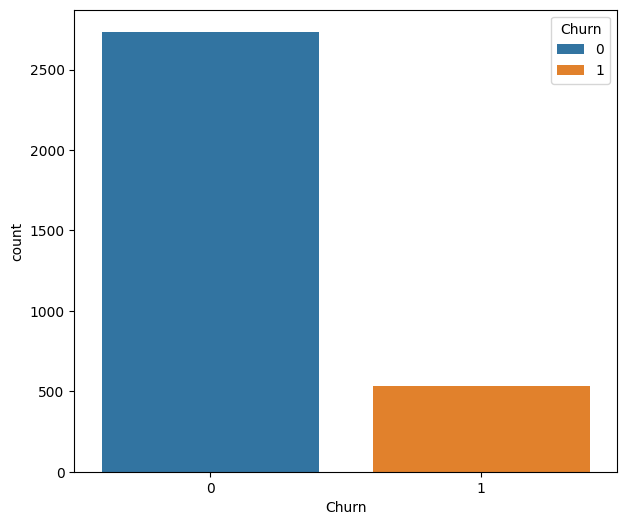

In [19]:
display(df['Churn'].value_counts()/df.shape[0])

plt.figure(figsize=(7,6))
sns.countplot(data=df, x='Churn', hue='Churn')
plt.show()

> The proportion of customers who churn (1) is significantly smaller (16.3%) than those who do not churn (0) (83.7%), indicating a **class imbalance**. This issue needs to be addressed, as machine learning models may become biased towards the majority class and fail to accurately predict churned customers. One way to handle this is by using resampling techniques

In [20]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [21]:
df.describe(include='object').T

,count,unique,top,freq
PreferedOrderCat,3269,5,Laptop & Accessory,1213
MaritalStatus,3269,3,Married,1686


- Kategori barang dengan pembelian terbanyak: **Laptop & Accessory**, dengan total 1,458 pembelian dari 6 kategori yang tersedia.
- Status pelanggan terbanyak: **Married**, dengan total 2,055 pelanggan dari 3 status yang tersedia.


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,3110.0,10.190354,8.650821,0.0,2.0,9.00,16.00,61.00
WarehouseToHome,3134.0,15.510849,8.569707,5.0,9.0,13.00,20.00,127.00
NumberOfDeviceRegistered,3269.0,3.676660,1.017477,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3269.0,3.020801,1.395326,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3269.0,4.223616,2.623308,1.0,2.0,3.00,6.00,22.00
Complain,3269.0,0.281738,0.449915,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3088.0,4.546956,3.695715,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3269.0,177.435528,49.307614,0.0,145.9,163.89,197.14,324.99
Churn,3269.0,0.163047,0.369465,0.0,0.0,0.00,0.00,1.00


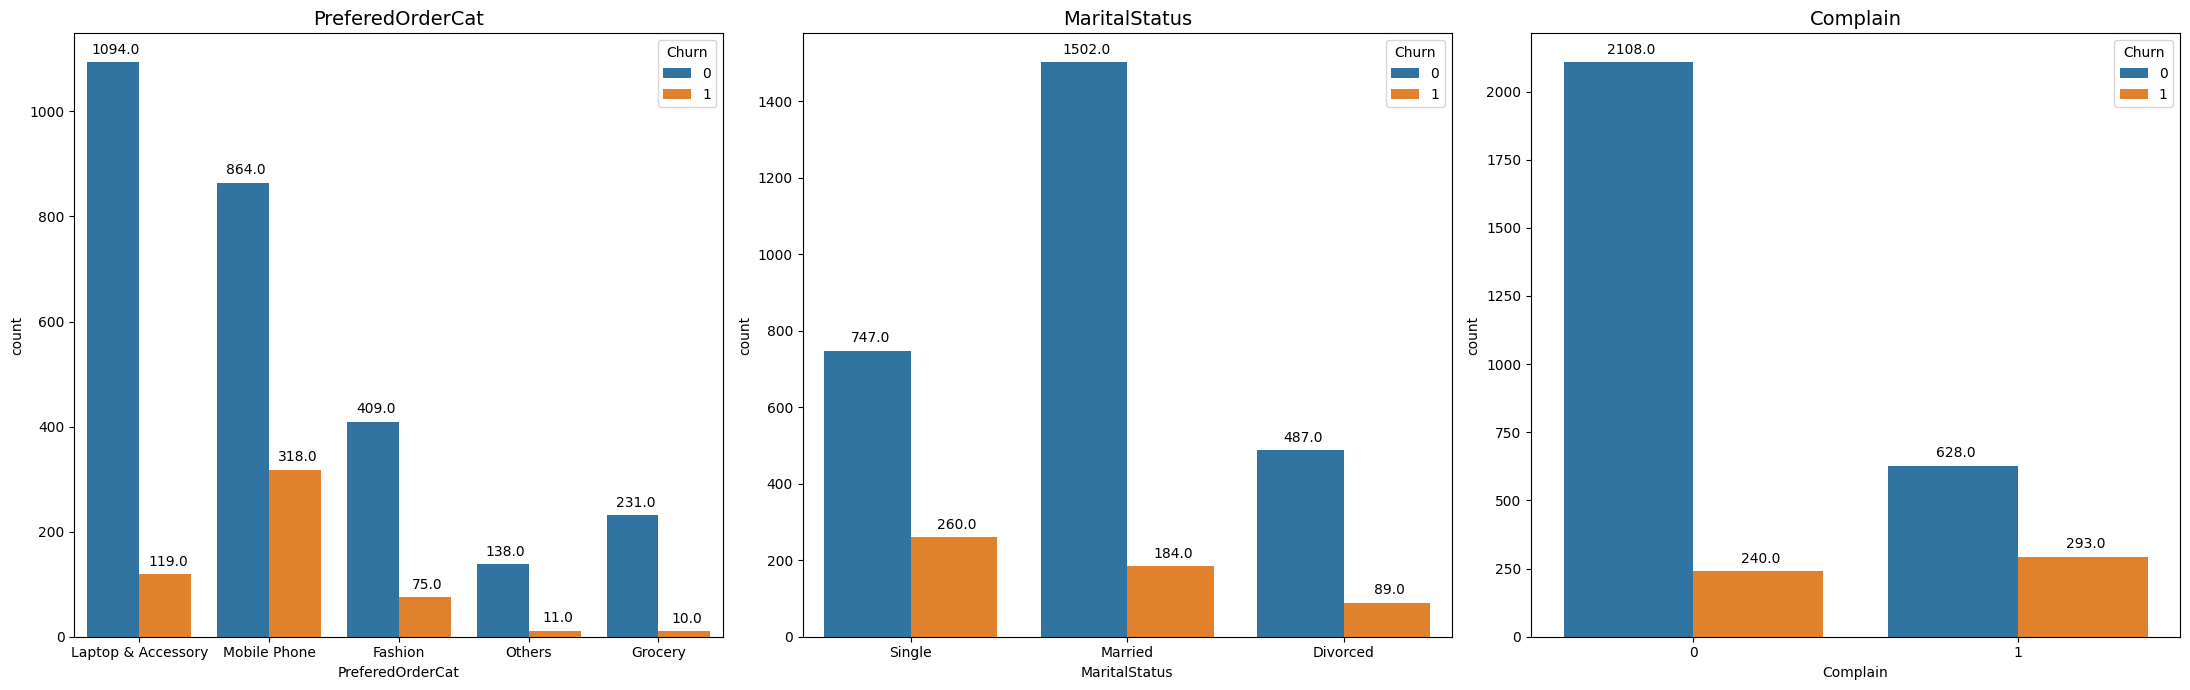

In [23]:
columns = ['PreferedOrderCat', 'MaritalStatus', 'Complain']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7))

for ax, col in zip(axes, columns):
    sns.countplot(data=df, x=col, hue='Churn', ax=ax)
    ax.set_title(col, fontsize=14)
    ax.tick_params(axis='x', rotation=0)

    # Menambahkan anotasi di atas setiap batang
    for p in ax.patches:
        height = p.get_height()
        if height != 0:
            ax.annotate(f'{height}', 
                        xy=(p.get_x() + p.get_width() / 2, height), 
                        xytext=(2, 4),
                        textcoords='offset points',
                        ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


Insight:

- The product category with the highest churn rate is **Mobile Phones**, possibly due to several factors. Mobile phones have a relatively long lifespan, and the development of new models does not occur very quickly. Additionally, the high price of mobile phones makes consumers more cautious and requires more careful consideration before deciding to purchase a new phone.
- Customers with a **Single status** (unmarried and not divorced) have a high churn rate, likely because they are more price-sensitive or dissatisfied with services, as they may have more independent shopping habits and a tendency to explore or compare prices at other stores.
- Customers who have made **complaints (1)** have a higher churn rate, likely due to dissatisfaction with the products or services they received.

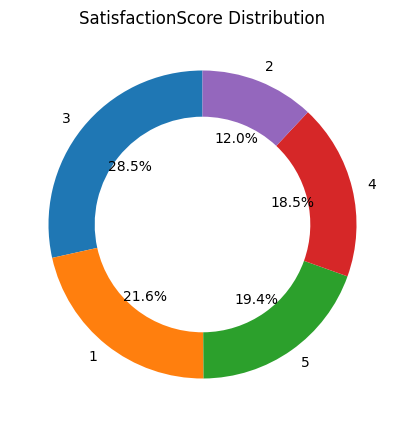

In [24]:
fig, ax = plt.subplots(figsize=(10, 5)) 
cat_counts = df['SatisfactionScore'].value_counts()
ax.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})
ax.set_title('SatisfactionScore Distribution')
plt.show()


Insight:
The donut chart shows that the **majority of customers have a moderate satisfaction level (3)**, followed by **low satisfaction (1)** and **high satisfaction (5)**. This indicates a **significant dissatisfaction**, but there are also many customers who are **very satisfied**. The varying satisfaction levels highlight the need to **improve services in areas that are less satisfactory**, while maintaining the aspects that are already pleasing customers.

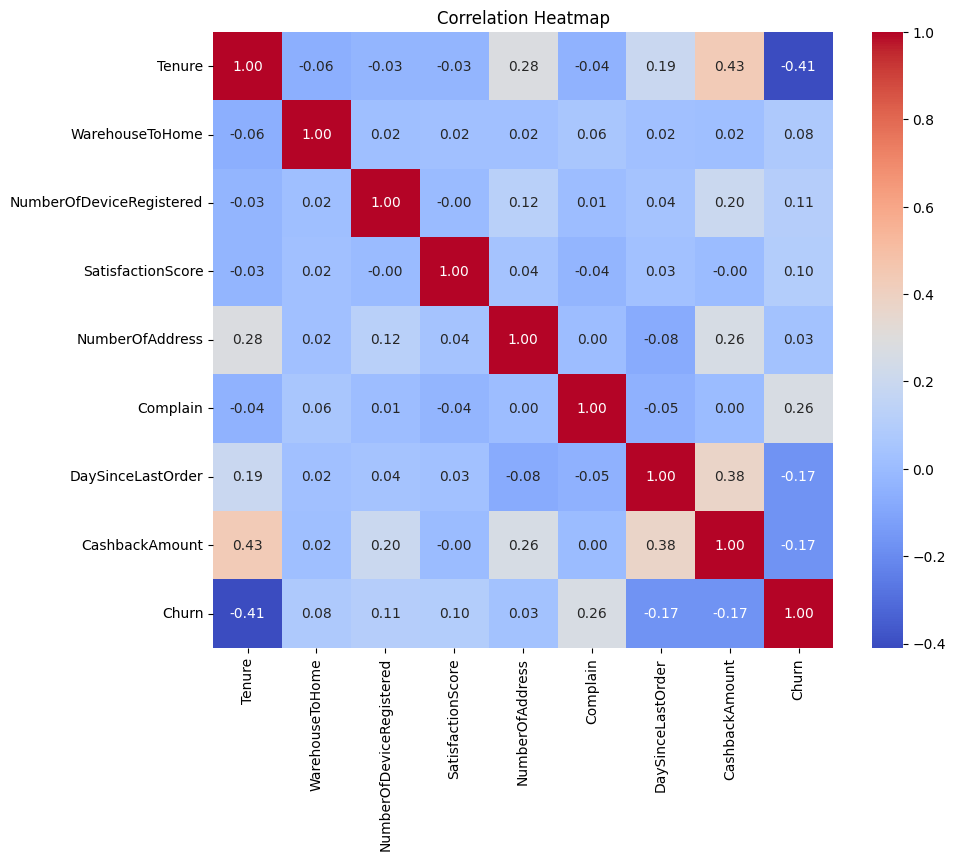

In [25]:
correlation_matrix = df.corr(method="spearman", numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Insight:
1. **Tenure and Churn**: A strong negative correlation (-0.42). The longer a customer has been subscribed, the less likely they are to churn.
2. **CashbackAmount and Tenure**: A strong positive correlation (0.43). The larger the cashback amount received, the longer the customer has been subscribed.
3. **DaySinceLastOrder and CashbackAmount**: A positive correlation (0.38). The longer the time since the last order, the higher the cashback amount received.
4. **Complain and Churn**: A positive correlation (0.26). Customers who make complaints are more likely to churn.


# **3. Define X and y**

The goal of this classification is to predict whether a customer will churn or not.Therefore, the Churn column will be the target variable (`y`), while all other columns will serve as features (`X`). All features are relevant, so none will be dropped.

In [26]:
df.head(1)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0


In [27]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [28]:
X.head(1)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32


In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3933    0
3935    0
3936    0
3937    0
3940    0
Name: Churn, Length: 3269, dtype: int64

---

# **4. Train Test Split**

> The purpose of this split is to train the model on one portion of the data and then evaluate how well the model performs on data it has never seen before.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**Important to define stratify**

Stratification ensures that the **proportion of different classes (e.g., churn vs non-churn) remains consistent in both the training and test sets**. This is crucial when dealing with **class imbalance**. Without stratification, an imbalanced class distribution may occur in either the training or test set, which can lead to biased model training or evaluation.

---

# **5. Preprocessing**

Preprocessing is the process of preparing raw data for modeling by transforming it into a clean, structured format. It involves handling **missing values**, **encoding categorical variables**, and **scaling numerical features** to improve the model's performance and accuracy.

**Impute**

- **Iterative**:  
For `Tenure` and `DaySinceLastOrder`, since there is a strong correlation with other columns, it helps to estimate missing values based on the related feature values.

- **Median**:  
For `WarehouseToHome`, since the correlation is weak, it is better to use methods like mean/median imputation. Median is chosen because all numeric columns in this dataset are not normally distributed.

**Encoder**

- **One-Hot Encoder**:  
For `PreferedOrderCat` and `MaritalStatus` because these categories have no order and a relatively small number of categories. One-Hot Encoding helps avoid assigning ordinal weight to the model.

**Scaler**

- **Robust Scaler**:  
For `Tenure`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `SatisfactionScore`, `NumberOfAddress`, `DaySinceLastOrder`, `CashbackAmount`, as there are outliers in this dataset. The Robust Scaler method is more resistant to the influence of outliers.

The `Complain` and `Churn` columns are not encoded because they are already in 0 & 1 format.

In [31]:
df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

In [32]:
pd.DataFrame({
    'column': df.columns.values,
    'data_type': df.dtypes.values,
    'missing_value': df.isna().sum().values,
    'missing_value(%)': df.isna().mean().values * 100,
    'negative_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'duplicate(%)' : df.duplicated().mean() * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,column,data_type,missing_value,missing_value(%),negative_value(%),0_value(%),duplicate,duplicate(%),n_unique,sample_unique
0,Tenure,float64,159,4.864,0.0,8.626,0,0.0,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,135,4.130,0.0,0.000,0,0.0,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,0,0.000,0.0,0.000,0,0.0,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,0.000,0.0,0.000,0,0.0,5,"[Laptop & Accessory, Mobile Phone, Fashion, Ot..."
4,SatisfactionScore,int64,0,0.000,0.0,0.000,0,0.0,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,0.000,0.0,0.000,0,0.0,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.000,0.0,0.000,0,0.0,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,0.000,0.0,71.826,0,0.0,2,"[0, 1]"
8,DaySinceLastOrder,float64,181,5.537,0.0,8.718,0,0.0,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,0,0.000,0.0,0.092,0,0.0,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


In [33]:
pipe_median_robust = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('robust', RobustScaler())  
])

pipe_iter_robust = Pipeline([
    ('imp_iterative', IterativeImputer()),
    ('robust', RobustScaler())
])

pipe_robust = Pipeline([
    ('robust', RobustScaler())
])

transformer = ColumnTransformer([
    ('pipe_iter_robust', pipe_iter_robust, ['Tenure', 'DaySinceLastOrder']),
    ('pipe_median_robust', pipe_median_robust, ['WarehouseToHome']),
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus']),
    ('pipe_robust', pipe_robust, ['SatisfactionScore', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'CashbackAmount']),
], remainder='passthrough')

In [34]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_iter_robust',
                                 Pipeline(steps=[('imp_iterative',
                                                  IterativeImputer()),
                                                 ('robust', RobustScaler())]),
                                 ['Tenure', 'DaySinceLastOrder']),
                                ('pipe_median_robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust', RobustScaler())]),
                                 ['WarehouseToHome']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus']),
                                ('pipe_robust',
                                 Pipeline(steps=[('robust', RobustScaler())]),
                                 ['SatisfactionScore',
                                  'NumberOfDeviceRegistered', 'NumberOfAddress',
                                  'CashbackAmount'])])

# **6. Benchmark Model** 


In [35]:
# define the models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()               
dt = DecisionTreeClassifier(random_state=42) 
rf = RandomForestClassifier(random_state=42) 
xgb = XGBClassifier(verbosity=1, random_state=42)             
lgbm = lgb.LGBMClassifier(random_state=42)             

In [36]:
voting = VotingClassifier(
    estimators=[
        ('logreg', logreg),
        ('rf', rf),
        ('xgb', xgb),
        ('lgbm', lgbm)
    ],
    voting='soft' 
)

stacking = StackingClassifier(
    estimators=[
        ('knn', knn),
        ('rf', rf),
        ('xgb', xgb),
        ('lgbm', lgbm)
    ],
    final_estimator=LogisticRegression() 
)

> cross validation

In [37]:
f2_score = make_scorer(fbeta_score, beta =2)


# List of models
list_algo = [logreg, knn, dt, rf, xgb, lgbm, voting, stacking]
list_all_score = []
list_mean = []
list_std = []

# Cross-validation dengan berbagai metrik
for algo in list_algo:

    fold = StratifiedKFold(n_splits=5)

    # Pipeline untuk preprocessing dan modeling
    pipe_model = Pipeline([
        ("preprocessing", transformer), 
        ("modeling", algo)
    ])

    # Cross-validation dengan F2 Score sebagai scoring
    cv_result = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=fold,
        scoring=f2_score,  # Menggunakan F2 Score

    )
    list_all_score.append(cv_result.round(2))
    list_mean.append(cv_result.mean())
    list_std.append(cv_result.std())

[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163002 -> initscore=-1.636060
[LightGBM] [Info] Start training from score -1.636060
[LightGBM] [Info] Number of positive: 341, number of negative: 1751
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 2092, number of used features: 14
[LightGBM] [Info] [binary:Bo

In [38]:
pd.reset_option('all')
# pd.set_option('display.max_colwidth', None)
df_cv = pd.DataFrame({
    # "algo": ["Logistic Regression", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost", "LightGBM"],
    "algo": list_algo,
    "f2_scores": list_all_score,
    "f2_scores_mean": list_mean,
    "f2_scores_std": list_std
})

df_cv.sort_values(by="f2_scores_mean", ascending=False)

,algo,f2_scores,f2_scores_mean,f2_scores_std
4,"XGBClassifier(base_score=None, booster=None, c...","[0.57, 0.74, 0.64, 0.69, 0.65]",0.659081,0.057452
7,"StackingClassifier(estimators=[('knn', KNeighb...","[0.65, 0.63, 0.6, 0.66, 0.68]",0.644629,0.026754
5,LGBMClassifier(random_state=42),"[0.61, 0.66, 0.65, 0.62, 0.65]",0.636787,0.019918
2,DecisionTreeClassifier(random_state=42),"[0.61, 0.65, 0.61, 0.62, 0.61]",0.621635,0.015883
6,"VotingClassifier(estimators=[('logreg', Logist...","[0.62, 0.65, 0.57, 0.6, 0.64]",0.616900,0.026339
3,RandomForestClassifier(random_state=42),"[0.59, 0.64, 0.55, 0.62, 0.57]",0.593313,0.034198
0,LogisticRegression(random_state=42),"[0.46, 0.52, 0.37, 0.5, 0.46]",0.461247,0.052487
1,KNeighborsClassifier(),"[0.42, 0.39, 0.32, 0.43, 0.47]",0.405893,0.049095


1. **Best Model Based on F2-score Mean**:
   - **XGBClassifier** achieves the highest F2-score mean of **0.6591**. This suggests that it offers the best overall balance between recall and precision, making it the ideal candidate for further optimization.

2. **Model Stability**:
   - **XGBClassifier** also exhibits a relatively low standard deviation (**0.0575**), which indicates that its performance is more stable across different cross-validation folds. This means that the model not only performs well but also provides consistent results.

3. **Alternative Models**:
   - **StackingClassifier** performs very well with an F2-score mean of **0.6446** and a standard deviation of **0.0268**, showing a good balance between recall and precision, with stable results across folds.
   - **LGBMClassifier** delivers solid performance with an F2-score mean of **0.6368** and a very low standard deviation (**0.0199**), indicating reliable and consistent performance across the cross-validation process.
   - **DecisionTreeClassifier** also shows respectable F2-scores but slightly lower than **StackingClassifier** and **LGBMClassifier**.

4. **Models to Avoid**:
   - **LogisticRegression** and **KNeighborsClassifier** have much lower F2-score means (**0.4612** and **0.4059**, respectively), suggesting that they are less effective at balancing recall and precision. These models are likely unsuitable for accurate churn prediction.

# **7. Hyperparameter Tuning**

**Resampling**

In imbalanced datasets, the model tends to predict the **majority class** well but struggles with the **minority class**. To address this, **resampling techniques** are used to balance the class distribution by either adding more data from the minority class (**oversampling**) or reducing data from the majority class (**undersampling**). Here are some resampling techniques that can be applied:

- **Random OverSampling (ROS)**: Adds data from the **minority class** by randomly duplicating samples.
- **Random UnderSampling (RUS)**: Reduces the number of samples from the **majority class** randomly.
- **NearMiss**: Reduces the **majority class** by selecting samples closest to the **minority class**.
- **SMOTE**: Generates **synthetic samples** for the **minority class** by interpolating between existing data.

In [39]:
# resampler
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
nearmiss = NearMiss()
smote = SMOTE(random_state=0)

> will perform hyperparameter tuning for the XGB Classifier model

**XGBoost Algorithm**

**XGBoost** (Extreme Gradient Boosting) is a machine learning algorithm that is an implementation of the **gradient boosting method**. **Gradient boosting** itself is an **ensemble technique** that combines several **weak learners**, usually **decision trees**, to create a stronger model by gradually minimizing errors.

How **XGBoost** works:  
**Decision Trees**: **XGBoost** uses **decision trees** as **base learners**. Each tree is generated to **correct the errors** made by the previous tree. Initially, **XGBoost** creates a tree that **classifies** or **predicts** the data. Subsequent trees are built to **correct the prediction errors** made by the previous trees.

In [40]:
# Define scoring metrics
f2_score = make_scorer(fbeta_score, beta=2)

fold = StratifiedKFold(n_splits=5)

param_grid = {
    'modeling__learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'modeling__n_estimators': [50, 100, 200, 300],  # Number of boosting rounds
    'modeling__max_depth': [3, 5, 10, 15],  # Maximum depth of trees
    'modeling__min_child_weight': [1, 5, 10],  # Minimum sum of instance weight (hessian) needed in a child
    'modeling__subsample': [0.6, 0.7, 0.8, 1.0],  # Fraction of samples to use for each tree
    'modeling__colsample_bytree': [0.6, 0.7, 0.8, 1.0],  # Fraction of features used for each tree
    'modeling__colsample_bylevel': [0.6, 0.7, 0.8, 1.0],  # Fraction of features to sample per level
    'modeling__gamma': [0, 0.1, 0.5, 1],  # Regularization term for tree pruning
    'modeling__reg_alpha': [0, 0.1, 0.5, 1],  # L1 regularization term
    'modeling__reg_lambda': [0, 0.1, 0.5, 1],  # L2 regularization term
    'modeling__scale_pos_weight': [1, 5, 10, 20],  # Weight for positive class in imbalanced datasets
    'modeling__eval_metric': ['logloss', 'error', 'auc', 'rmse'],  # Evaluation metric
    'modeling__objective': ['binary:logistic'],  # Objective function
    'modeling__booster': ['gbtree', 'gblinear', 'dart'],  # Boosting type options
    'modeling__max_bin': [63, 128, 256],  # Number of bins used for discrete features
    'resampling': [None, rus, ros, smote, nearmiss],  # Resampling methods (if needed)
}

# Pipeline prep dan modeling for XGBClassifier
pipe_model = Pipeline([
    ('resampling', None),
    ('prep', transformer),
    ('modeling', xgb)
])

# GridSearchCV for XGBClassifier
grid_search = GridSearchCV(
    estimator=pipe_model,
    param_grid=param_grid,
    scoring=f2_score,
    cv=fold,
    n_jobs=-1
)

# RandomizedSearchCV for XGBClassifier
random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=param_grid,
    scoring=f2_score,
    cv=fold,
    n_jobs=-1,
    n_iter=400,
    random_state=42
    # refit='f2'
)


In [41]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('resampling', None),
                                             ('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iter_robust',
                                                                               Pipeline(steps=[('imp_iterative',
                                                                                                IterativeImputer()),
                                                                                               ('robust',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'DaySinceLastOrder']),
                                                                              ('pipe_median_robust',
                                                                               Pip...
                                        'modeling__reg_alpha': [0, 0.1, 0.5, 1],
                                        'modeling__reg_lambda': [0, 0.1, 0.5,
                                                                 1],
                                        'modeling__scale_pos_weight': [1, 5, 10,
                                                                       20],
                                        'modeling__subsample': [0.6, 0.7, 0.8,
                                                                1.0],
                                        'resampling': [None,
                                                       RandomUnderSampler(random_state=0),
                                                       RandomOverSampler(random_state=0),
                                                       SMOTE(random_state=0),
                                                       NearMiss()]},
                   random_state=42,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [42]:
results_df = pd.DataFrame(random_search.cv_results_)

In [43]:
pd.reset_option('all')
results_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampling,param_modeling__subsample,param_modeling__scale_pos_weight,param_modeling__reg_lambda,param_modeling__reg_alpha,param_modeling__objective,...,param_modeling__booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
394,0.342230,0.019313,0.025020,0.002333,RandomOverSampler(random_state=0),1.0,10,0.5,0.5,binary:logistic,...,gbtree,{'resampling': RandomOverSampler(random_state=...,0.791209,0.833333,0.801282,0.760870,0.768398,0.791018,0.025755,1
179,164.812939,93.873784,0.153356,0.048758,RandomOverSampler(random_state=0),0.7,20,0.1,0.0,binary:logistic,...,dart,{'resampling': RandomOverSampler(random_state=...,0.784946,0.826360,0.814433,0.768421,0.759754,0.790783,0.025776,2
261,3.600638,0.832548,0.057848,0.023024,RandomOverSampler(random_state=0),0.7,10,1.0,0.0,binary:logistic,...,dart,{'resampling': RandomOverSampler(random_state=...,0.772532,0.828025,0.829832,0.757895,0.736515,0.784960,0.037688,3
386,0.791197,0.075288,0.037895,0.010678,None,0.7,20,0.0,0.1,binary:logistic,...,gbtree,"{'resampling': None, 'modeling__subsample': 0....",0.780543,0.806818,0.808190,0.765864,0.755940,0.783471,0.021131,4
113,40.879191,0.534335,0.092413,0.008242,RandomOverSampler(random_state=0),0.6,5,0.1,0.5,binary:logistic,...,dart,{'resampling': RandomOverSampler(random_state=...,0.768421,0.811088,0.802846,0.773931,0.737052,0.778667,0.026439,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.004578,0.003474,0.000000,0.000000,SMOTE(random_state=0),1.0,5,1.0,0.5,binary:logistic,...,gblinear,"{'resampling': SMOTE(random_state=0), 'modelin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,225
92,0.001431,0.001850,0.000000,0.000000,NearMiss(),0.8,10,0.0,1.0,binary:logistic,...,dart,"{'resampling': NearMiss(), 'modeling__subsampl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,225
258,0.010030,0.003924,0.000000,0.000000,NearMiss(),1.0,5,0.0,0.1,binary:logistic,...,gblinear,"{'resampling': NearMiss(), 'modeling__subsampl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,225
100,0.006260,0.003226,0.000000,0.000000,SMOTE(random_state=0),0.7,10,0.1,0.5,binary:logistic,...,gbtree,"{'resampling': SMOTE(random_state=0), 'modelin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,225


In [44]:
random_search.best_score_

0.7910184018879672

In [45]:
random_search.best_params_

{'resampling': RandomOverSampler(random_state=0),
 'modeling__subsample': 1.0,
 'modeling__scale_pos_weight': 10,
 'modeling__reg_lambda': 0.5,
 'modeling__reg_alpha': 0.5,
 'modeling__objective': 'binary:logistic',
 'modeling__n_estimators': 300,
 'modeling__min_child_weight': 1,
 'modeling__max_depth': 15,
 'modeling__max_bin': 63,
 'modeling__learning_rate': 0.1,
 'modeling__gamma': 1,
 'modeling__eval_metric': 'error',
 'modeling__colsample_bytree': 0.6,
 'modeling__colsample_bylevel': 0.8,
 'modeling__booster': 'gbtree'}

| **Parameter**                 | **Description**                                                                                 |
|-------------------------------|-------------------------------------------------------------------------------------------------|
| **resampling**                | Uses **RandomOverSampler** to handle class imbalance.                                           |
| **modeling__subsample**       | Proportion of data used for each tree (**1.0 = 100%**).                                         |
| **modeling__scale_pos_weight**| Sets the weight of the positive class to handle imbalanced data better.                         |
| **modeling__reg_lambda**      | **L2 regularization** to reduce overfitting (**0.5 = moderate regularization**).                |
| **modeling__reg_alpha**       | **L1 regularization** to reduce overfitting (**0.5 = moderate regularization**).                |
| **modeling__objective**       | Specifies binary classification (**'binary:logistic'**).                                        |
| **modeling__n_estimators**    | Number of decision trees to be built (**300 trees**).                                           |
| **modeling__min_child_weight**| Minimum weight to split a node in the tree (**1 = minimum**).                                   |
| **modeling__max_depth**       | Maximum depth of decision trees (**15 = deep trees**).                                          |
| **modeling__max_bin**         | Number of bins to split continuous features (**63 bins**).                                      |
| **modeling__learning_rate**   | Learning rate (**0.1 = tree impact per iteration**).                                            |
| **modeling__gamma**           | Controls tree complexity, required loss reduction (**1 = threshold**).                          |
| **modeling__eval_metric**     | Model evaluation metric (**'error' = classification error rate**).                              |
| **modeling__colsample_bytree**| Proportion of features used for each tree (**0.6 = 60%**).                                      |
| **modeling__colsample_bylevel**| Proportion of features used at each tree level (**0.8 = 80%**).                                |
| **modeling__booster**         | Type of booster used (**gbtree = decision tree**).                                              |

In [46]:
best_model = random_search.best_estimator_  

# **8. Predict to Test Set**

> **Before Tuning**

In [47]:
# define model

# define model
Pipe_model = Pipeline([
    ('preprocessing',transformer),
    ('modeling', xgb)
    ])

# fitting to Train Set
Pipe_model.fit(X_train, y_train)

# Predict to Test set
y_pred_before = Pipe_model.predict(X_test)

# f2 score
f2_score_beforetuning = fbeta_score(y_test, y_pred_before, beta=2)
f2_score_beforetuning

0.8082706766917294

> **After Tuning**

In [48]:
# define model
best_model = random_search.best_estimator_

# fitting to Train Set
best_model.fit(X_train, y_train)

# Predict to Test set
y_pred_after = best_model.predict(X_test)

# f2 score
f2_score_aftertuning = fbeta_score(y_test, y_pred_after, beta=2)
f2_score_aftertuning

0.8519793459552496

# **9. Optimized Threshold**

In [66]:
# pipeline
pipe_model = random_search.best_estimator_

# fit
pipe_model.fit(X_train, y_train)

# ==================================================================================
list_threshold = np.arange(0.01, 1.00, 0.01)
list_f2 = []
list_f2_train = []

for threshold in list_threshold:
    y_pred_proba_train = pipe_model.predict_proba(X_train)[:, 1] 
    y_pred_proba_train = np.where(y_pred_proba_train > threshold, 1, 0)     # yg probability-nya di atas threshold masuk ke kelas 1 

    f2score_train_threshold = fbeta_score(y_train, y_pred_proba_train, beta=2)
    list_f2_train.append(f2score_train_threshold)

    # predict
    y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]       # hasil prediksi dalam bentuk probability
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)     # yg probability-nya di atas threshold masuk ke kelas 1 

    # f2 score
    list_f2.append(fbeta_score(y_test, y_pred_class, beta=2)) 

In [67]:
df_th = pd.DataFrame()
df_th['threshold'] = list_threshold
df_th['f2_test'] = list_f2
df_th['f2_train'] = list_f2_train
df_th.sort_values(['f2_test'], ascending=False)

,threshold,f2_test,f2_train
47,0.48,0.864726,0.949198
46,0.47,0.858844,0.948775
45,0.46,0.857385,0.946667
39,0.40,0.857143,0.938326
38,0.39,0.857143,0.937500
...,...,...,...
96,0.97,0.622490,0.981176
1,0.02,0.601800,0.620629
0,0.01,0.552686,0.561709
97,0.98,0.508299,0.920172


In [68]:
best_threshold = df_th.sort_values(['f2_test','threshold'], ascending=[False, True]).head(3).iloc[0,0]
best_threshold

0.48000000000000004

**Modelling dengan Best Threshold**

In [69]:
best_model = random_search.best_estimator_

best_model.fit(X_train, y_train)

#predict test
y_pred_proba = best_model.predict_proba(X_test)[:,1]
y_pred_optimized = np.where(y_pred_proba > best_threshold, 1, 0)

#f2
f2score_test_optimized = fbeta_score(y_test, y_pred_optimized, beta=2)
f2score_test_optimized

0.8647260273972602

In [70]:
# train
y_pred_proba_train = pipe_model.predict_proba(X_train)[:, 1] 
y_pred_proba_train = np.where(y_pred_proba_train > best_threshold, 1, 0)

f2score_train_optimized = fbeta_score(y_train, y_pred_proba_train, beta=2)
f2score_train_optimized

0.9491978609625669

In [71]:
print(f2_score_beforetuning, 'XGboost Before Tuning')
print(f2_score_aftertuning, 'XGboost After Tuning')
print(f2score_test_optimized, 'XGboost After Tuning and Optimized Threshold')

0.8082706766917294 XGboost Before Tuning
0.8519793459552496 XGboost After Tuning
0.8647260273972602 XGboost After Tuning and Optimized Threshold


> Let’s see if overfitting occurs in the model after tuning

In [72]:
df_tuning = pd.DataFrame({
    'Before Tuning' : [df_cv['f2_scores_mean'][4],f2_score_beforetuning],
    'After Tuning':[random_search.best_score_,f2_score_aftertuning],
    'After Tuning and Optimized Threshold':[f2score_train_optimized,f2score_test_optimized]
},index=['Train Data','Test Data'])
df_tuning

,Before Tuning,After Tuning,After Tuning and Optimized Threshold
Train Data,0.659081,0.791018,0.949198
Test Data,0.808271,0.851979,0.864726


The **After Tuning and Optimized Threshold** model shows signs of **overfitting**, with very good performance on the **training data** but less satisfactory performance on the **test data**. Therefore, I have decided to use the **After Tuning model without Optimized Threshold**, which performs **adequately**, with a relatively small gap between the **training** and **test data**, and is more **generalizable**.

# **10. Confusion Matrix**

**To calculate the losses, we will use the confusion matrix** generated by the model. Based on the values in the **confusion matrix**, we can calculate the total **losses** for the company by considering the costs for **False Positives (FP)** and **False Negatives (FN)**. The losses are calculated based on **incorrect predictions**, where **FP** causes losses because the model predicts **churn** when the customer does not actually churn, and **FN** causes losses because the model predicts no churn when the customer actually churns. Therefore, using the **confusion matrix** will provide a clear picture of the **financial impact** of the model’s **prediction decisions**.

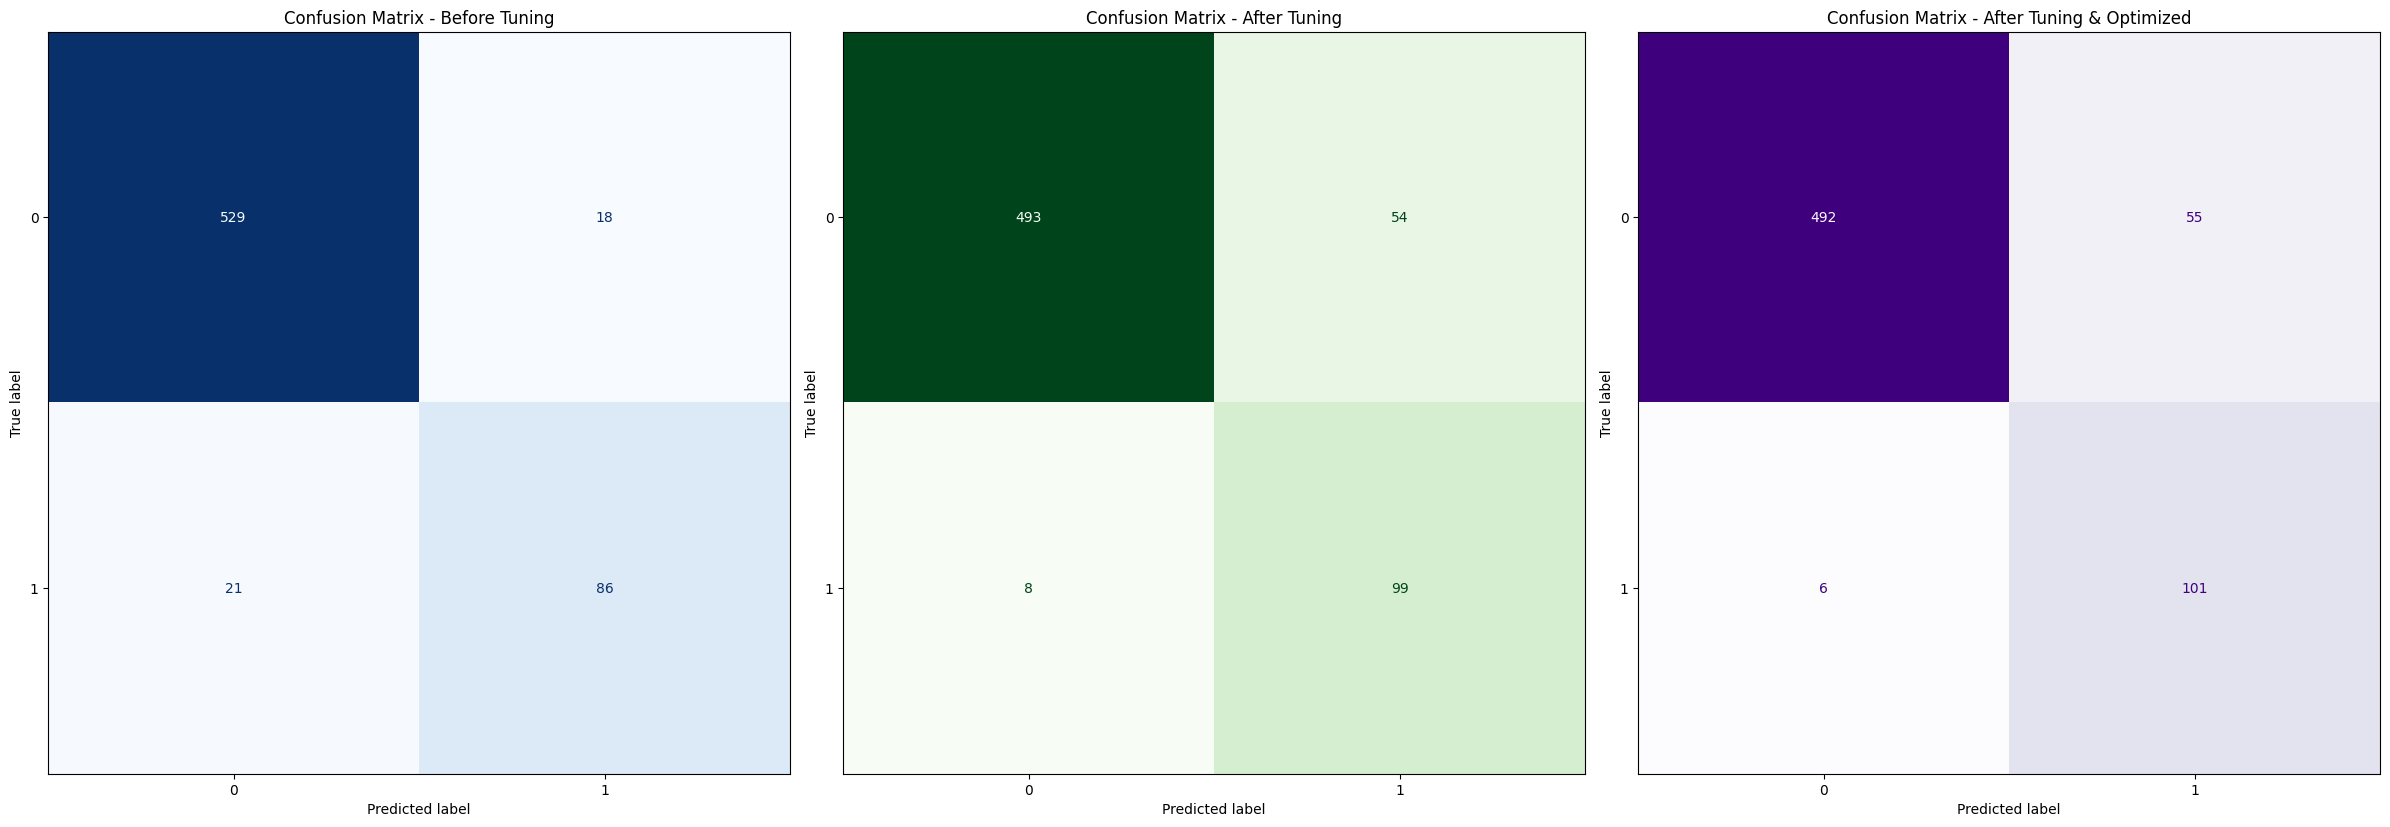

In [89]:
# Assuming y_test, y_pred_before, y_pred_after, and y_pred_optimized are already defined
cm_before = confusion_matrix(y_test, y_pred_before)
cm_after = confusion_matrix(y_test, y_pred_after)
cm_optimized = confusion_matrix(y_test, y_pred_optimized)

display_before = ConfusionMatrixDisplay(cm_before)
display_after = ConfusionMatrixDisplay(cm_after)
display_after_optimized = ConfusionMatrixDisplay(cm_optimized)

# Plotting all three confusion matrices in a single figure
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Set titles for each plot and use calm, neutral colormaps
axes[0].set_title("Confusion Matrix - Before Tuning")
display_before.plot(ax=axes[0], colorbar=False, cmap="Blues")  # Calm blue tones

axes[1].set_title("Confusion Matrix - After Tuning")
display_after.plot(ax=axes[1], colorbar=False, cmap="Greens")  # Soft green tones

axes[2].set_title("Confusion Matrix - After Tuning & Optimized")
display_after_optimized.plot(ax=axes[2], colorbar=False, cmap="Purples")  # Gentle purple tones

# Adjust layout and display
plt.tight_layout()
plt.show()

**Summary:**

The model to be used is the one that has gone through the tuning process, with the optimized threshold **not applied**. This model provides a **higher F2-score**, indicating a better balance between recall and precision, making it more effective in predicting customer churn.

- **True Prediction (Accuracy)** = (TP + TN) / Total = 592 / 654 = `90.51%` which indicates **correct predictions** (both churn and non-churn), and 9.33% represents the incorrect predictions (False Positives + False Negatives).
- **True Positive Rate (Recall)** = TP / (TP + FN) = 493 / 501 = `98.40%` (Out of all the customers who actually churned, **the model successfully detected 98.40%** of them as **churn**, and the remaining 1.60% were undetected (FNR)).
- **Precision** = TP / (TP + FP) = 493 / 547 = `90.16%` (Out of all the churn predictions made by the model, **90.16% are actually churn**, while the remaining 9.84% are incorrectly predicted as churn (False Positives)).

- **False Positive Rate (FPR)** = FP / (FP + TN) = 54 / 153 = `35.29%` (Out of all the customers who did not churn, **the model incorrectly predicted 35.29%** of them as churn (false positives)).

- **False Negative Rate (FNR)** = 1 - Recall = `1.60%` (Out of all the customers who actually churned, **the model failed to detect 1.60%** of them as churn).

At the stage of defining evaluation metrics, it has been established that if the model incorrectly predicts a customer **not to churn when they actually churn** (False Negative, FN), the company will incur a loss of **$200 per customer**. On the other hand, if the model incorrectly predicts a customer **to churn when they actually do not churn** (False Positive, FP), the company will incur a loss of **$50 per customer**.

Therefore, let's calculate the difference in losses across the following four scenarios to compare whether it is better to use the model or not:

**Estimation of Churn and Non-Churn Customers in the Test Data**  
Based on the distribution before train-test split:  
- Total customers in the test data = 654  
- Churn (1): 16.3% of 654 = 107 churn customers  
- Non-churn (0): 83.7% of 654 = 547 non-churn customers

---

- **Without Machine Learning**  
Without machine learning, all customers will receive promotions, and the loss is calculated based on customers who churned but were not detected and customers who did not churn but still received promotions.  
  - Churn customers not detected: `$200` x 107 = `$21,400`  
  - Non-churn customers given promotions: `$50` x 547 = `$27,350`  
  - Total loss = `$48,750`

---

- **With Machine Learning (Before Tuning)**  
  - Total FN: `$200` x 21 = `$4,200`  
  - Total FP: `$50` x 18 = `$900`  
  - The company incurs a loss of `$4,200` + `$900` = `$5,100`

---

- **With Machine Learning (After Tuning)**  
  - Total FN: `$200` x 8 = `$1,600`  
  - Total FP: `$50` x 54 = `$2,700`  
  - The company incurs a loss of `$1,600` + `$2,700` = `$4,300`

---

- **With Machine Learning (After Tuning & Threshold Optimized)**  
  - Total FN: `$200` x 6 = `$1,200`  
  - Total FP: `$50` x 55 = `$2,750`  
  - The company incurs a loss of `$1,200` + `$2,750` = `$3,950` --> Although this model results in the lowest cost of loss,** its overfitting** nature makes it **less reliable for new data**. Overfitting models tend to perform poorly on unseen data, making them **unsuitable for real-world** applications despite their lower calculated costs

---

**Conclusion:**  
Based on the calculations above, using the model is more beneficial than not using a model. Without the model, the company faces a significantly larger loss of $48,750. The use of the model helps the company significantly reduce this loss.

The most beneficial model is the one **after tuning** (without threshold optimization). While there is a slight increase in losses from **False Positives**, this model results in a total loss of **$4,300**, which is lower than both the "Before Tuning" model ($5,100) and the "Without Machine Learning" scenario ($48,750).

The loss that can be avoided by using the model with tuning (without threshold optimization) is **$44,450** (91.18%), providing a significant reduction in potential losses for the company. 

--- 

# **11. Explainable Machine Learning**

## **Feature Importance**

In [74]:
pd.set_option('display.max_colwidth', None)
print(best_model)

Pipeline(steps=[('resampling', RandomOverSampler(random_state=0)),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_iter_robust',
                                                  Pipeline(steps=[('imp_iterative',
                                                                   IterativeImputer()),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['Tenure',
                                                   'DaySinceLastOrder']),
                                                 ('pipe_median_robust',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                        

In [ ]:
# Mengakses transformer di dalam pipeline
feature_pipe_iter_robust = best_model['prep'].transformers_[0][2]  # Fitur yang diproses dengan pipe_iter_robust
feature_pipe_median_robust = list(best_model['prep'].transformers_[1][1].get_feature_names_out())  # Fitur hasil median_robust
feature_pipe_robust = list(best_model['prep'].transformers_[2][1].get_feature_names_out())  # Fitur yang diproses oleh pipe_robust

# Mendapatkan fitur hasil onehot encoding
feature_onehot = list(best_model['prep'].transformers_[3][1].get_feature_names_out())  # Fitur hasil onehot encoding

# Mendapatkan fitur yang diproses oleh passthrough (kolom yang tidak diproses oleh pipeline)
feature_remainder = list(X.columns[best_model['prep'].transformers_[4][2]])  # Kolom yang di-passthrough

# Menggabungkan semua fitur menjadi satu list
feature = feature_pipe_iter_robust + feature_pipe_median_robust + feature_pipe_robust + feature_onehot + feature_remainder

# Mengambil feature_importances_ dari model yang telah dilatih
imp = pd.DataFrame({
    'feature': feature,
    'importance': best_model['modeling'].feature_importances_  # Mengambil feature_importances_ dari model
}).sort_values('importance', ascending=False)
imp


,feature,importance
13,Complain,0.213365
0,Tenure,0.148971
3,PreferedOrderCat_Grocery,0.073363
12,CashbackAmount,0.069063
4,PreferedOrderCat_Laptop & Accessory,0.067514
11,NumberOfAddress,0.059357
5,PreferedOrderCat_Mobile Phone,0.056839
9,SatisfactionScore,0.052482
6,PreferedOrderCat_Others,0.047266
2,WarehouseToHome,0.046525


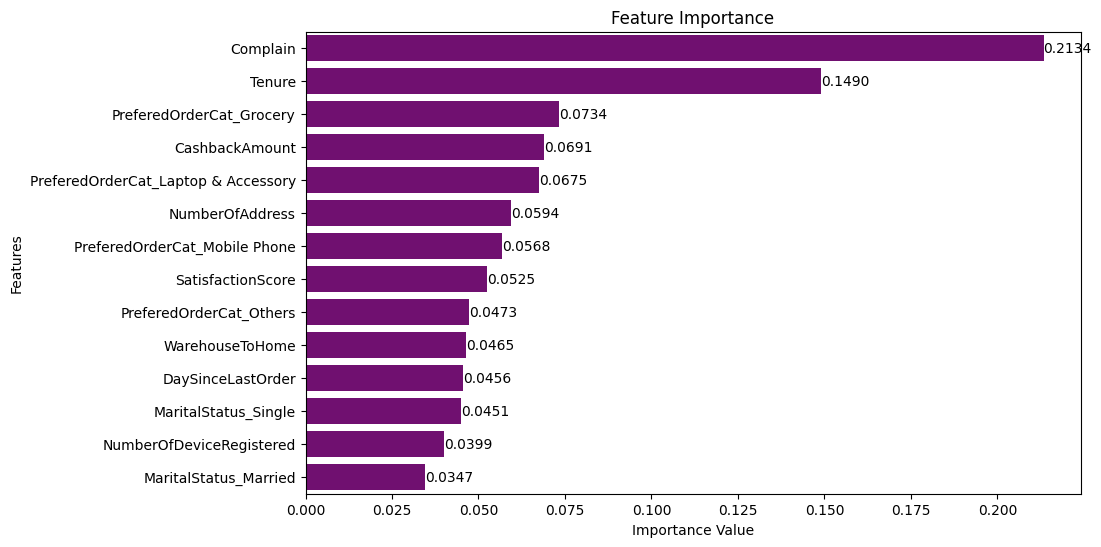

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=imp, y='feature', x='importance', color='purple')

for i, v in enumerate(imp['importance']):
    ax.text(v, i, f'{v:.4f}', va='center', ha='left', color='black')  # Menambahkan nilai pada setiap bar

plt.title('Feature Importance')

plt.xlabel('Importance Value')  
plt.ylabel('Features') 

plt.show()

In [77]:
# coef1 = pd.Series(best_model['modeling'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending=True)

# ax = coef1.plot(kind='barh', title='Feature Importances')

# for i, v in enumerate(coef1):
#     ax.text(v, i, f'{v:.4f}', va='center', ha='left', color='black')

# ax.set_xlabel('Importance Value') 
# ax.set_ylabel('Features')        
# plt.show()

Fitur yang memiliki nilai importance tertinggi adalah `Tenure` dan `Complain`, yang menunjukkan bahwa kedua fitur ini memiliki pengaruh yang lebih besar terhadap keputusan model. 

## **SHAP (Shapely Additive Explanations)**

In [78]:
my_model = pipe_model[-1]
my_data = pipe_model[1].transform(X_train)

explainer_shap = shap.TreeExplainer(
    model= my_model,
    data= my_data,
)

shap_values = explainer_shap.shap_values(my_data)

 95%|=================== | 2490/2615 [00:21<00:01]       

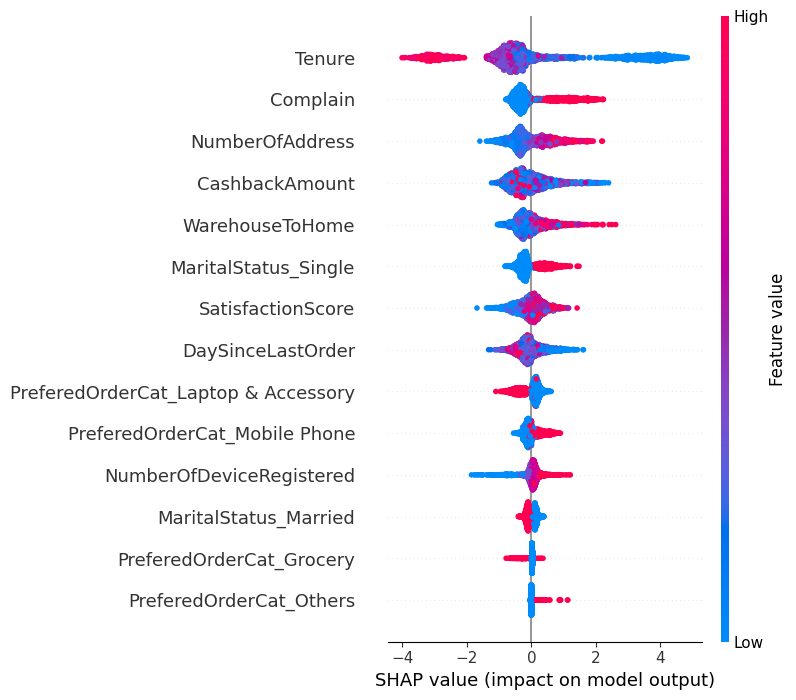

In [79]:
shap.summary_plot(shap_values, my_data, feature_names=feature)

**How to Read:**

1. **Vertical Axis:**
    - Displays the list of features used in the model, sorted by their importance in contributing to the predictions.

2. **Horizontal Axis:**
    - **Positive SHAP Values (To the Right):** The feature increases the probability of churn (1).
    - **Negative SHAP Values (To the Left):** The feature decreases the probability of churn (1) (or supports the probability of not churn = 0).

3. **Dot Color (Feature Value):**
    - **Red:** High feature value.
    - **Blue:** Low feature value.
    - For example, if `Tenure` is red (indicating high tenure) and leans to the left, it means customers with a long tenure are less likely to churn.

4. **Dot Density:**
    - The number of dots shows the data distribution for each SHAP value. The spread helps identify the relationship between feature values and their influence on the outcome.

**Insight:**

1. **`Tenure`**
   - The `Tenure` feature shows that newer customers tend to be more prone to churn. A large SHAP value on the left side indicates a strong contribution from low tenure towards the churn prediction. This suggests that the company may need to focus more on retaining new customers.

2. **`Complain`**
   - Complaints (`Complain`) are a very strong feature in predicting churn. If a customer submits a complaint, the model tends to predict they will churn, as seen with the strong positive SHAP value.

3. **`NumberOfAddress`:**
   - The SHAP value shifts to the right for higher `NumberOfAddress`, meaning customers with many registered addresses are more likely to churn (possibly because they are trying the service temporarily). On the other hand, if the SHAP value shifts to the left, customers with fewer addresses are less likely to churn.

4. **`SatisfactionScore`**
   - Customer satisfaction score has a clear relationship with churn prediction. The lower the satisfaction score, the higher the likelihood of churn, as seen from the distribution of SHAP values skewed to the left on this feature.

5. **`DaySinceLastOrder`**
   - This feature reflects the distance between the warehouse and the customer's home location. If this distance is long (high feature value) and the SHAP value leans to the right, then longer distances may cause dissatisfaction, increasing churn risk. Conversely, shorter distances (low values) can provide a better customer experience, reducing churn.

6. **`NumberOfDeviceRegistered`**
   - Customers with more devices registered on the platform show higher engagement and tend to be more loyal. This is reflected in the positive SHAP values, which contribute to the "0" prediction (not churning).

7. **`CashbackAmount`**
   - The influence of cashback provided by the company is also significant. This feature positively contributes to predicting retention, as higher cashback values encourage customers to continue using the service.

8. **`WarehouseToHome`**
   - This feature reflects the distance between the warehouse and the customer's home location. If the distance is long (high feature value) and the SHAP value leans to the right, it suggests that longer distances may cause dissatisfaction, increasing churn risk. Conversely, shorter distances (low values) can provide a better customer experience, reducing churn.

9. **`PreferedOrderCat`**
   - **PreferedOrderCat_Grocery**: Negative SHAP value, customers who frequently order daily necessities tend to be more loyal. This category often indicates stronger service attachment because it’s used for routine needs.
   
   - **PreferedOrderCat_Mobile Phone**: Positive SHAP value, customers who order electronics are more likely to churn. This could be because electronics purchases are often one-off (non-routine), leading to lower service engagement.
   
   - **PreferedOrderCat_Others**: Positive SHAP value, this category shows customers who are less focused on a particular category, making them more prone to churn.

10. **`MaritalStatus`**
      - **MaritalStatus_Single**: Positive SHAP value, single customers are more likely to churn. This could indicate that customers without dependents (e.g., family) are more likely to leave the service if they are dissatisfied.
      
      - **MaritalStatus_Married**: Negative SHAP value, married customers are less likely to churn. This suggests that married customers tend to be more loyal, possibly because their needs or spending patterns are more stable.

---

**Summary Explaianble ML:**

On the SHAP plot, it can be seen that the features at the top have the **greatest influence on the model's predictions, such as Tenure, Complain, NumberOfAddress, CashbackAmount**, and others. These features make a significant contribution to the model's decisions, both in increasing and decreasing the probability of churn.

The model works by assigning more weight to features with strong influence, and this order of features is visually displayed on the SHAP plot, with the most influential ones at the top and the least influential ones at the bottom.

**Intepretation**

In [114]:
X_test.head(6)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
1028,18.0,14.0,4,Others,1,Married,2,1,11.0,315.49
3666,18.0,11.0,2,Others,5,Married,3,0,14.0,316.90
626,10.0,9.0,4,Mobile Phone,3,Single,6,0,10.0,150.19
229,18.0,27.0,4,Mobile Phone,4,Single,3,0,4.0,159.20
2207,1.0,12.0,2,Mobile Phone,3,Single,5,1,4.0,149.32
1654,0.0,10.0,4,Mobile Phone,3,Single,6,0,2.0,138.94


In [115]:
X_test.iloc[[5]]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
1654,0.0,10.0,4,Mobile Phone,3,Single,6,0,2.0,138.94


In [105]:
y_test.iloc[[5]]

1654    1
Name: Churn, dtype: int64

With the features available in X_test, we will try to predict and see if the model's prediction results match the actual data in y_test, which indicates churn.

In [106]:
shap.initjs()

In [107]:
def shap_plot(index, model, dataframe):

    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(dataframe)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[index], dataframe.iloc[[index]])

    return(p)

In [108]:
X_test_prep = pd.DataFrame(best_model[1].transform(X_test), columns=feature)

In [109]:
print(f"The prediction must predict this customers is: {('Churn' if y_test.iloc[5] == 1 else 'Not Churn')}")

shap_plot(
    index= 5, 
    model= my_model, 
    dataframe= X_test_prep
)

The prediction must predict this customers is: Churn


The observation at index-5 in X_test shows that a customer with the following features:

- PreferedOrderCat_MobilePhone = 1 (ordered mobile phone),
- MaritalStatus_Single = 1 (single marital status),
- NumberOfAddress = 0.75 (has multiple registered addresses),
- Tenure = -0.4545 (new customer),
- CashbackAmount = -0.3728 (received a small cashback),

is **likely to churn**. This predicted data **matches** the **actual data**.

# **12. Save Model**

In [110]:
# best model
best_model = random_search.best_estimator_

# fit
best_model.fit(X, y)

# save with pickle
with open('xgboost_model.sav', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# **13. Conclusion & Recommendation**

### **Conclusion**

1. The **factors **contributing to churn include **customer satisfaction and demographic** characteristics of the customers. (Column : Tenure, Complain, NumberOfAddress, WarehouseToHome, Cashback)

2. `Shoply` can **predict** customer churn using a machine learning model based on the XGBoost algorithm & F2 Score evaluation metrics with the following performance:
- Accuracy = 90.51% (The rate of correct predictions, both churn and non-churn).
- True Positive (TP) = 493 (The number of churn cases correctly detected).
- **Recall  = 98.40%** (Out of all customers who actually churn, 98.40% were correctly detected).
- **Precision = 90.16%** (Out of all predicted churns, 90.16% are actual churns).
- False Positive Rate (FPR) = 35.29% (The rate of incorrectly predicting churn for customers who did not churn).
- False Negative Rate (FNR) = 1.60% (The rate of incorrectly predicting no churn for customers who actually churned).

3. The **loss** that can be **avoided** by using the model with tuning (without threshold optimization) is **$44,450 (91.18%)**, providing a significant reduction in potential losses for the company. 


### **Recommendation**

### `for Business`

**1. `Tenure`**
- **Insight:** New customers tend to be more likely to churn.
- **Recommendation:**
  - **Focus on retaining new customers**: Implement retention programs for newly registered customers (e.g., offer discounts or exclusive services after a certain period to strengthen their relationship).
  - **Enhance onboarding**: Create a more engaging and informative onboarding experience to help new customers feel more connected to the service from the start.

---

**2. `NumberOfAddress`**
- **Insight:** Customers with multiple addresses are more likely to churn.
- **Recommendation:**
  - **Consolidate address management**: For customers with multiple addresses registered, consider offering personalized services or special promotions to bind them more closely to the platform (e.g., delivery to one main address).
  - **Increase customer satisfaction**: Focus on keeping customers with a single active address more satisfied, as they are more likely to be loyal.

---

**3. `Complain`**
- **Insight:** Customer complaints are strongly associated with churn.
- **Recommendation:**
  - **Respond quickly to complaints**: Implement a system to handle complaints more quickly and effectively. For example, assign a dedicated team to monitor and respond to customer complaints promptly.
  - **Offer proactive solutions**: In addition to addressing complaints after they occur, consider providing customers with an easy way to give feedback and address issues before they feel the need to submit a formal complaint.

---

**4. `SatisfactionScore`**
- **Insight:** Customers with low satisfaction scores are more likely to churn.
- **Recommendation:**
  - **Improve customer experience**: Conduct a deeper analysis of the factors affecting satisfaction scores and find ways to improve the customer experience.
  - **Conduct regular surveys and follow-ups**: Carry out periodic satisfaction surveys and follow up with customers who give low scores to ensure their issues are addressed.

---

**5. `DaySinceLastOrder`**
- **Insight:** The longer the time since the last order, the higher the risk of churn.
- **Recommendation:**
  - **Offer incentives for more frequent purchases**: Encourage customers to place orders more frequently by providing discounts or special offers based on their purchase history.
  - **Reminders and notifications**: Use notifications or reminders to prompt customers to reorder if they haven’t made a purchase in a while.

---

**6. `NumberOfDeviceRegistered`**
- **Insight:** Customers with more registered devices are more loyal.
- **Recommendation:**
  - **Increase engagement with multiple devices**: Offer incentives or loyalty programs for customers who register multiple devices. For example, provide discounts or loyalty points every time a new device is registered.
  - **Create a seamless multi-device experience**: Ensure that the customer experience is consistent and smooth across all the devices they use.

---

**7. `CashbackAmount`**
- **Insight:** Higher cashback increases customer loyalty.
- **Recommendation:**
  - **Offer higher cashback**: For customers at risk of churning, consider offering higher cashback or other loyalty rewards to encourage them to keep using the service.
  - **Promote cashback programs**: Ensure customers are aware of the cashback benefits and how they can earn more from the program.

---

**8. `WarehouseToHome`**
- **Insight:** Longer delivery distances can increase the risk of churn.
- **Recommendation:**
  - **Optimize delivery**: Focus on reducing delivery distances, either by opening more distribution centers or using more efficient logistics systems.
  - **Offer expedited delivery options**: For customers with longer shipping distances, offer express delivery options for a fee, or provide discounts on long-distance shipping.

---

**9. `PreferedOrderCat` (Grocery, Mobile Phone, Others)**
- **Grocery:**
  - **Insight:** Customers who order daily necessities are more likely to be loyal.
  - **Recommendation:** Offer a **loyalty program** targeting customers who frequently purchase groceries, such as discounts on the next purchase or free shipping.

- **Mobile Phone:**
  - **Insight:** Customers who buy electronics tend to be more vulnerable to churn.
  - **Recommendation:** Offer **after-sales programs** or **extended warranties** for customers who purchase electronics to increase their engagement with the service.

- **Others:**
  - **Insight:** Customers who order irregularly across different categories are more likely to churn.
  - **Recommendation:** **Personalize promotions** for customers who purchase across multiple product categories. Offer special deals or product recommendations based on their shopping habits.

---

**10. `MaritalStatus`**
- **Single:**
  - **Insight:** Single customers are more prone to churn.
  - **Recommendation:** Focus on **retaining single customers** by providing more personalized user experiences and offering exclusive loyalty programs or discounts.

- **Married:**
  - **Insight:** Married customers tend to be more loyal.
  - **Recommendation:** Create **family offers** or **special packages** that appeal to married customers, such as joint subscriptions or family-oriented delivery plans at better prices.

---

### `for Future Model:`

1. Use **k-fold** cross-validation with a different number of folds, such as **10**, as it can provide a more stable and accurate estimate of model performance compared to 5-fold.
2. Perform feature selection for the next model evaluation by referring to feature importance values. **Select features** with the highest **importance scores** to simplify the model, reduce the risk of overfitting, and retain key information.
3. Conduct **regular model maintenance**, as the model’s performance may degrade over time due to changes in data distribution (data drift).
4. **Analyze prediction errors** in depth to identify patterns, root causes of errors, and areas that require improvement.